In [294]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [295]:
df=pd.read_csv('../data/survey_results_public.csv')

In [296]:
print('df has {} rows and {} columns'.format(*df.shape))

df has 64461 rows and 61 columns


In [297]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [298]:
df.head()

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0   European Euro  ...  Neither easy nor difficult  Appropriate in length   
1  Pound sterling  ...                         NaN                    NaN   
2             NaN  ...  Neither easy nor difficult  Appropriate in length   
3    Albanian lek  ...                         NaN                    NaN   
4             NaN  ...                        Easy              Too short   

  Trans                                     UndergradMajor  \
0    No  Computer science, computer engineering, or sof...   
1   NaN  Computer science, computer engineering, or sof...   
2   NaN                                                NaN   
3    No  Computer science, computer engineering, or sof...   
4    No  Computer science, computer engineering, or sof...   

  WebframeDesireNextYear    WebframeWorkedWith  \
0           ASP.NET Core  ASP.NET;ASP.NET Core   
1                    NaN                   NaN   
2                    NaN                   NaN   
3                    NaN                   NaN   
4   Django;Ruby on Rails         Ruby on Rails   

                              WelcomeChange WorkWeekHrs YearsCode YearsCodePro  
0   Just as welcome now as I felt last year        50.0        36           27  
1  Somewhat more welcome now than last year         NaN         7            4  
2  Somewhat more welcome now than last year         NaN         4          NaN  
3  Somewhat less welcome now than last year        40.0         7            4  
4   Just as welcome now as I felt last year         NaN        15            8  

[5 rows x 61 columns]

In [299]:
all_categoricals=[]
all_multi_options=[]
all_numericals=[]

In [300]:
all_categoricals.append('MainBranch')
# df['MainBranch'].unique()
# df['MainBranch'].hist(xrot=90)
# df[['MainBranch', 'ConvertedComp']].boxplot(by='MainBranch', showfliers=False, rot=90)

In [301]:
all_numericals.append('Age')
# pd.to_numeric(df['Age'], errors='coerce').hist(bins=100, xrot=90)

In [302]:
all_numericals.append('Age1stCode')
# pd.to_numeric(df['Age1stCode'], errors='coerce').hist(bins=100, xrot=90)

In [303]:
all_categoricals.append('Country')
# df['Country'].unique()
# df['Country'].hist(xrot=90, figsize=(20, 5))

In [304]:
all_multi_options.append('DatabaseWorkedWith')
# df['DatabaseWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['DatabaseWorkedWithCnt']=df['DatabaseWorkedWith'].str.split(';').str.len()
# df[['DatabaseWorkedWithCnt', 'ConvertedComp']].boxplot(by='DatabaseWorkedWithCnt', showfliers=False)
all_numericals.append('DatabaseWorkedWithCnt')

In [305]:
all_multi_options.append('DevType')
# df['DevType'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['DevTypeCnt']=df['DevType'].str.split(';').str.len()
# df[['DevTypeCnt', 'ConvertedComp']].boxplot(by='DevTypeCnt', showfliers=False, rot=90)
all_numericals.append('DevTypeCnt')

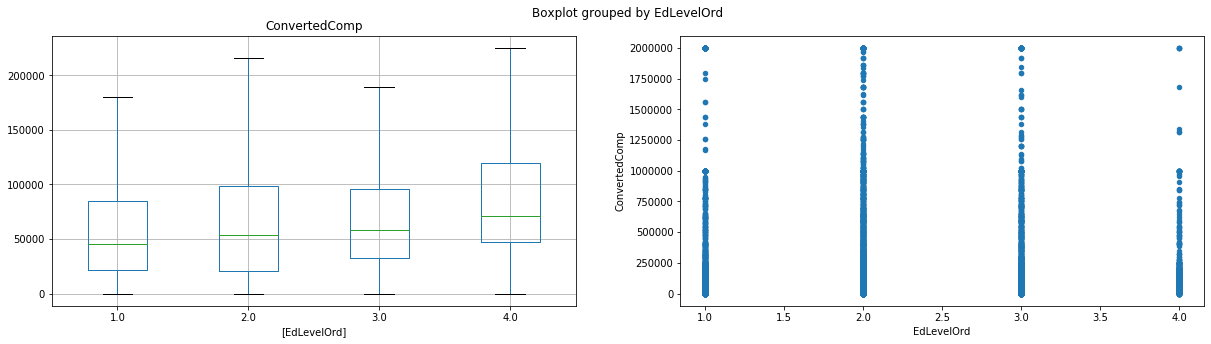

In [306]:
all_categoricals.append('EdLevel')
# # df['EdLevel'].hist(xrot=90)
degree_mapping={'I never completed any formal education': 1, 
                'Primary/elementary school': 1, 
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1, 
                'Some college/university study without earning a degree': 1, #3
#                 'Associate degree (A.A., A.S., etc.)': 1, #4
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 2, 
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 3, 
                'Other doctoral degree (Ph.D., Ed.D., etc.)': 4}
all_numericals.append('EdLevelOrd')
df['EdLevelOrd']=df['EdLevel'].map(degree_mapping)
fig, ax=plt.subplots(1, 2, figsize=(20, 5))
df[['EdLevelOrd', 'ConvertedComp']].boxplot(by='EdLevelOrd', showfliers=False, ax=ax[0])
df[['EdLevelOrd', 'ConvertedComp']].plot(kind='scatter', x='EdLevelOrd', y='ConvertedComp', ax=ax[1])
# df['EdLevelOrd'].value_counts().sort_index()

In [307]:
all_categoricals.append('Employment')
# df['Employment'].hist(xrot=90)

In [308]:
# multi_options.append('Ethnicity')
# df['Ethnicity'].str.get_dummies(sep=';')

In [309]:
all_multi_options.append('Gender')
# dummies=df['Gender'].str.get_dummies(sep=';')
# gender_list=dummies.columns
# melt_df=pd.melt(pd.concat([df['ConvertedComp'], dummies], axis=1), id_vars=['ConvertedComp'], value_vars=gender_list)
# melt_df[melt_df['value']==1].boxplot(by='variable', column='ConvertedComp', showfliers=False, vert=False)
df['GenderCnt']=df['Gender'].str.split(';').str.len()
# df[['GenderCnt', 'ConvertedComp']].boxplot(by='GenderCnt', showfliers=False, rot=90)
all_numericals.append('GenderCnt')

In [310]:
all_multi_options.append('LanguageWorkedWith')
# df['LanguageWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['LanguageWorkedWithCnt']=df['LanguageWorkedWith'].str.split(';').str.len()
# df[['LanguageWorkedWithCnt', 'ConvertedComp']].boxplot(by='LanguageWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('LanguageWorkedWithCnt')

In [311]:
all_multi_options.append('MiscTechWorkedWith')
# df['MiscTechWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['MiscTechWorkedWithCnt']=df['MiscTechWorkedWith'].str.split(';').str.len()
# df[['MiscTechWorkedWithCnt', 'ConvertedComp']].boxplot(by='MiscTechWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('MiscTechWorkedWithCnt')

In [312]:
all_multi_options.append('NEWCollabToolsWorkedWith')
# df['NEWCollabToolsWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['NEWCollabToolsWorkedWithCnt']=df['NEWCollabToolsWorkedWith'].str.split(';').str.len()
# df[['NEWCollabToolsWorkedWithCnt', 'ConvertedComp']].boxplot(by='NEWCollabToolsWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('NEWCollabToolsWorkedWithCnt')

In [313]:
all_categoricals.append('OpSys')
# df['OpSys'].hist(xrot=90)

In [314]:
all_multi_options.append('PlatformWorkedWith')
# df['PlatformWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['PlatformWorkedWithCnt']=df['PlatformWorkedWith'].str.split(';').str.len()
# df[['PlatformWorkedWithCnt', 'ConvertedComp']].boxplot(by='PlatformWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('PlatformWorkedWithCnt')

In [315]:
all_categoricals.append('UndergradMajor')
# df['UndergradMajor'].hist(xrot=90)

In [316]:
all_multi_options.append('WebframeWorkedWith')
# df['WebframeWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)

In [317]:
all_numericals.append('YearsCode')
# pd.to_numeric(df['YearsCode'], errors='coerce').hist(bins=100, xrot=90)

In [318]:
all_numericals.append('YearsCodePro')
# df['YearsCodeProNEW']=pd.to_numeric(df['YearsCodePro'], errors='coerce').map(lambda x: min(x, 10))
# pd.to_numeric(df['YearsCodePro'], errors='coerce').hist(bins=100, xrot=90)

In [319]:
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
# # numericals=['YearsCodePro']
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
# # categoricals=['EdLevel']
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
# # multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [320]:
# us=df[(df['Country']=='United States') & 
#      (df['Employment']=='Employed full-time') &
#      (df['ConvertedComp']<=200000) & 
#      (df['ConvertedComp']>=40000)]
# us['YearsCodePro']=pd.to_numeric(us['YearsCodePro'], errors='coerce')
# us=us.dropna()
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test=train_test_split(us['YearsCodePro'], us['ConvertedComp'])
# lr=LinearRegression()
# lr.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
# lr.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

# Pipeline

In [321]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns=2

def run_model(X): 
    print(f'{X.shape} before trim')
    y=X.dropna()['ConvertedComp']
    input_ary=X.dropna().drop('ConvertedComp', axis=1)
#     y=X.dropna()['ConvertedComp']
    print(f'{input_ary.shape} after trim')        
#     mmscaler=MinMaxScaler()
#     print(input_ary.isnull().sum().sum())
#     print(y.isnull().sum().sum())
#     X_train, X_test, y_train_scaled, y_test_scaled=train_test_split(input_ary, y.reshape(-1))
    X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
    yscaler=StandardScaler()
#     y=mmscaler.fit_transform(y.values.reshape(-1, 1))
    yscaler.fit(y_train.values.reshape(-1, 1))
    y_train_scaled=yscaler.transform(y_train.values.reshape(-1, 1))
    y_test_scaled=yscaler.transform(y_test.values.reshape(-1, 1))
    xcaler=StandardScaler()
    xcaler.fit(X_train)
    X_train_scaled=xcaler.transform(X_train)
    X_test_scaled=xcaler.transform(X_test)
#     mmscaler.fit(pd.DataFrame(y_train))
#     y_train_scaled=mmscaler.transform(y_train.values.reshape(1, -1))
#     y_test_scaled=mmscaler.transform(y_test.values.reshape(1, -1))
#     y_train_scaled=mmscaler.transform(pd.DataFrame(y_train))
#     y_test_scaled=mmscaler.transform(pd.DataFrame(y_test))
    rfr=RandomForestRegressor()
    rfr.fit(X_train_scaled, y_train_scaled)
    print(f'RFR Train Score: {rfr.score(X_train_scaled, y_train_scaled)}')
    print(f'RFR Test Score: {rfr.score(X_test_scaled, y_test_scaled)}')
    lr=LinearRegression()
    lr.fit(X_train_scaled, y_train_scaled)
    print(f'LR Train Score: {lr.score(X_train_scaled, y_train_scaled)}')
    print(f'LR Test Score: {lr.score(X_test_scaled, y_test_scaled)}')
    print(sorted(list(zip(input_ary.columns, rfr.feature_importances_)), key=lambda x: x[1], reverse=True)[:10])
    return None

In [322]:
# X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=10000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
def transform_data(input_df, numericals=[], categoricals=[], multi_options=[]): 
    print(input_df.shape)
#     input_df=input_df[numericals+cateogoricals+multi_options].dropna()
    input_df=input_df.dropna(subset=numericals+categoricals+multi_options+['ConvertedComp'])
    X=input_df[['ConvertedComp']]
    columns=2
    fig, ax=plt.subplots(math.ceil(len(numericals)/columns), columns*2, figsize=(20, 20))
    for idx, each_col in enumerate(numericals): 
        if len(numericals)>2: 
            plt_ax_1=ax[int(idx/columns)][(idx%columns)*2]
            plt_ax_2=ax[int(idx/columns)][(idx%columns)*2+1]
        else: 
            plt_ax_1=ax[(idx%columns)*2]
            plt_ax_2=ax[(idx%columns)*2+1]
        X=pd.concat([X, pd.to_numeric(input_df[each_col], errors='coerce')], axis=1)                                                             # idx = 2 & 3
        X[['ConvertedComp', each_col]].boxplot(by=each_col, showfliers=False, rot=90, ax=plt_ax_1) # wants 0 & 2 when idx = 0 & 1 which means + 0 and + 1
                                                                                                                                                      # idx = 2 & 3
        X[['ConvertedComp', each_col]].plot(x=each_col, y='ConvertedComp', kind='scatter', ax=plt_ax_2) # wants 1 & 3 when idx = 0 & 1 which means + 1 and + 2
        plt_ax_2.set_title(each_col)
        plt_ax_1.set_title(each_col)
        plt_ax_1.grid(False)
    fig.suptitle('')
    fig.tight_layout()
    fig, ax=plt.subplots(math.ceil(len(categoricals)/columns), columns, figsize=(20, 10))
    for idx, each_col in enumerate([col for col in categoricals if col!='Country']): 
        if len(categoricals)>2: 
            plt_ax=ax[int(idx/columns)][idx%columns]
        else: 
            plt_ax=ax[idx%columns]
        X=pd.concat([X, pd.get_dummies(input_df[each_col])], axis=1)
        input_df[[each_col, 'ConvertedComp']].boxplot(by=each_col, showfliers=False, vert=False, ax=plt_ax)
        plt_ax.grid(False)
        plt_ax.set_title(each_col)
    fig.suptitle('')
    fig.tight_layout()
    fig, ax=plt.subplots(math.ceil(len(multi_options)/columns), columns, figsize=(20, 20))
    for idx, each_col in enumerate(multi_options): 
        if len(multi_options)>2: 
            plt_ax=ax[int(idx/columns)][idx%columns]
        else: 
            plt_ax=ax[idx%columns]
        dummies=input_df[each_col].str.get_dummies(sep=';')
        X=pd.concat([X, dummies], axis=1)
        options_list=dummies.columns
        melt_df=pd.melt(pd.concat([input_df['ConvertedComp'], dummies], axis=1), id_vars=['ConvertedComp'], value_vars=options_list)
        melt_df[melt_df['value']==1].boxplot(by='variable', column='ConvertedComp', showfliers=False, vert=False, ax=plt_ax)
        plt_ax.grid(False)
        plt_ax.set_title(each_col)
    fig.suptitle('')
    fig.tight_layout()
#     input_df[numericals].corr().style.background_gradient(cmap="summer")
    print(X.shape)
    return X

# Testing

In [323]:
all_numericals=list(set(all_numericals))
all_categoricals=list(set(all_categoricals))
all_multi_options=list(set(all_multi_options))
print(f'{len(all_numericals)} + {len(all_categoricals)} + {len(all_multi_options)}')

12 + 6 + 8


(64461, 69)
(14656, 165)


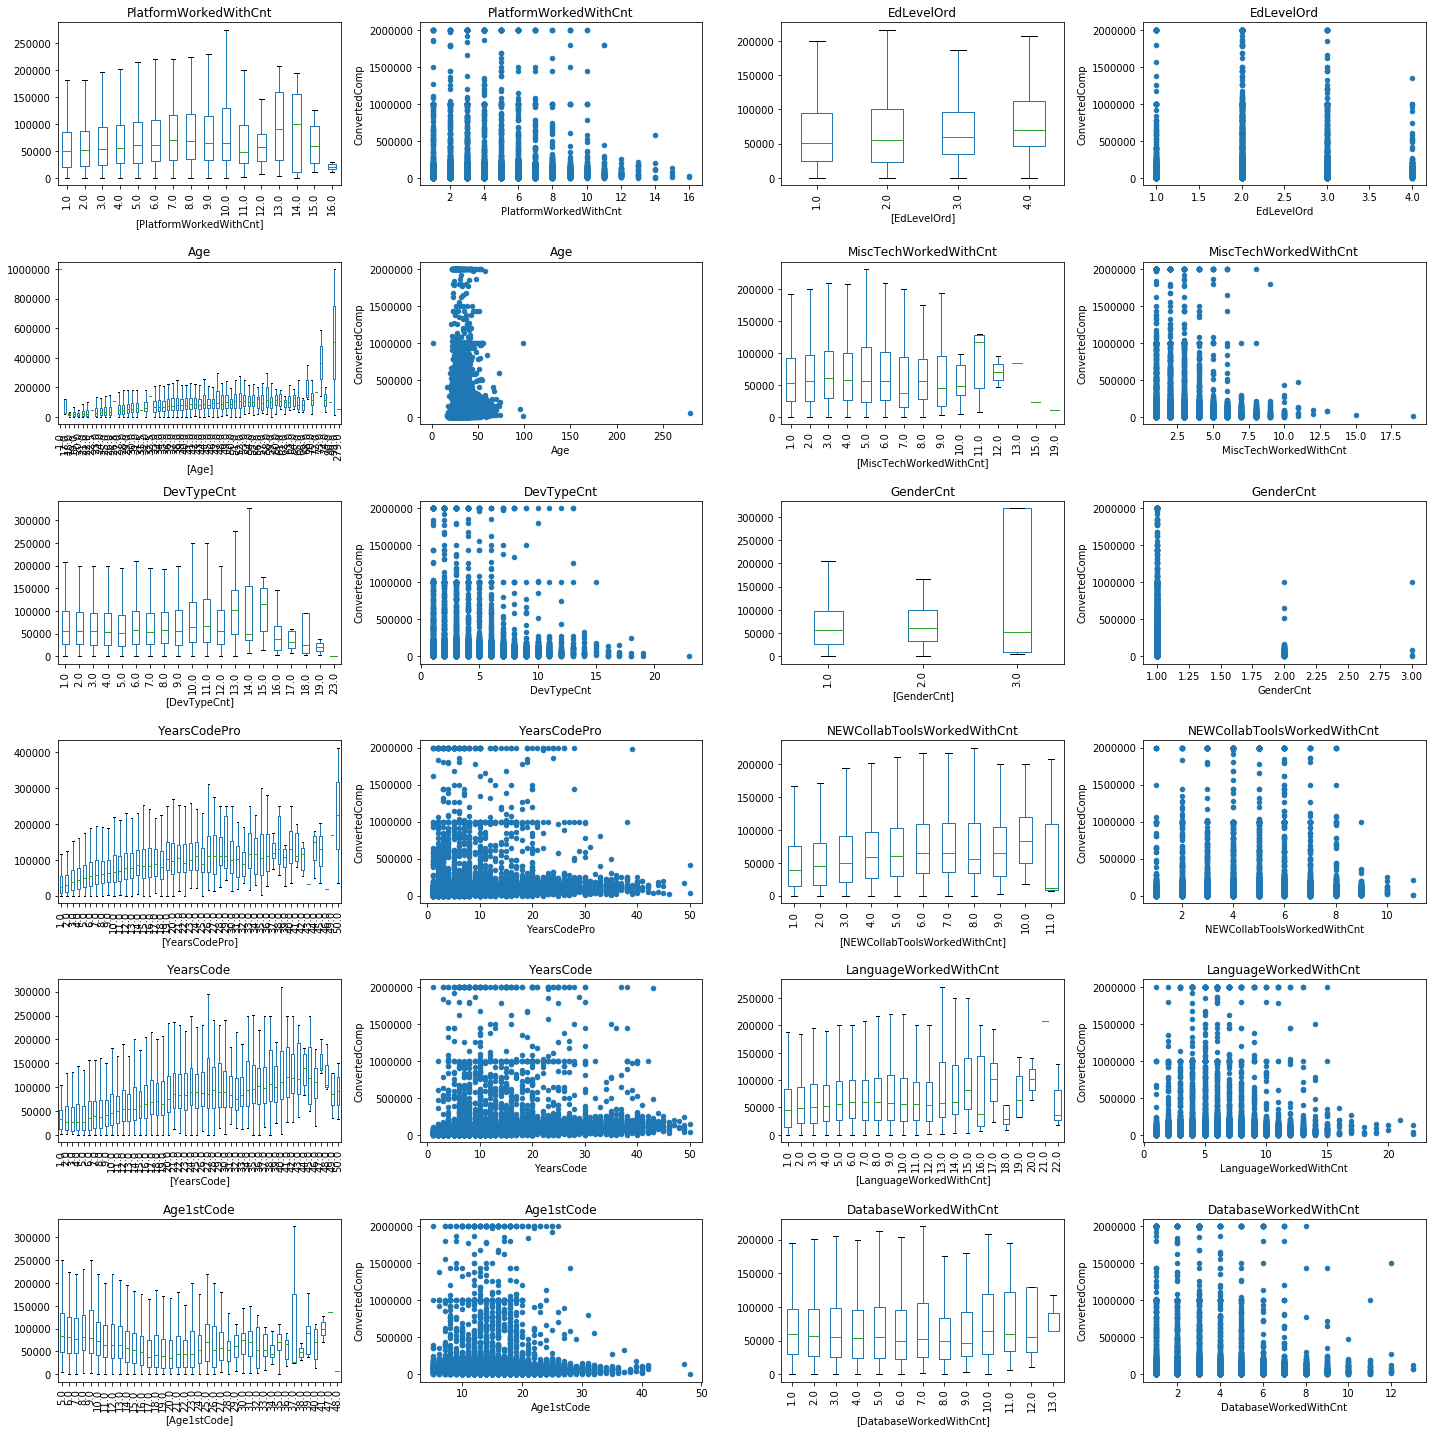

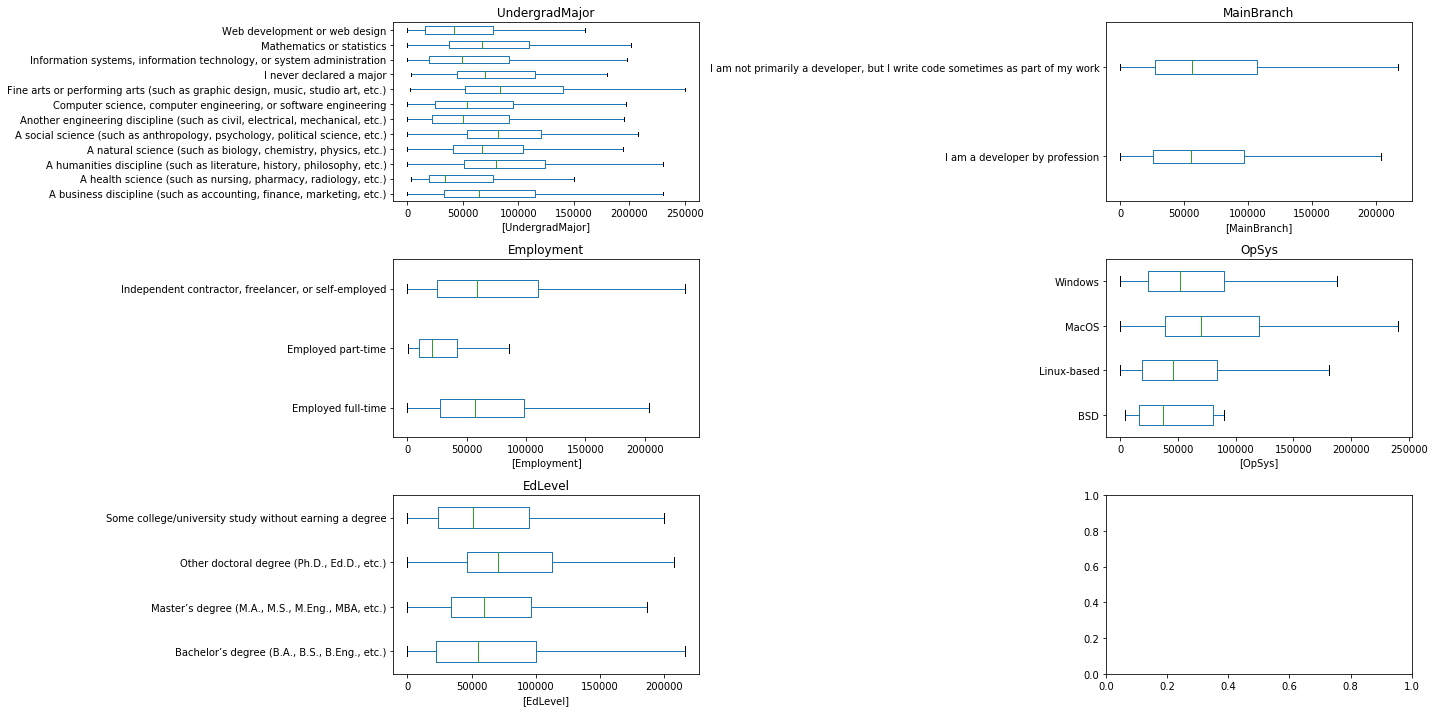

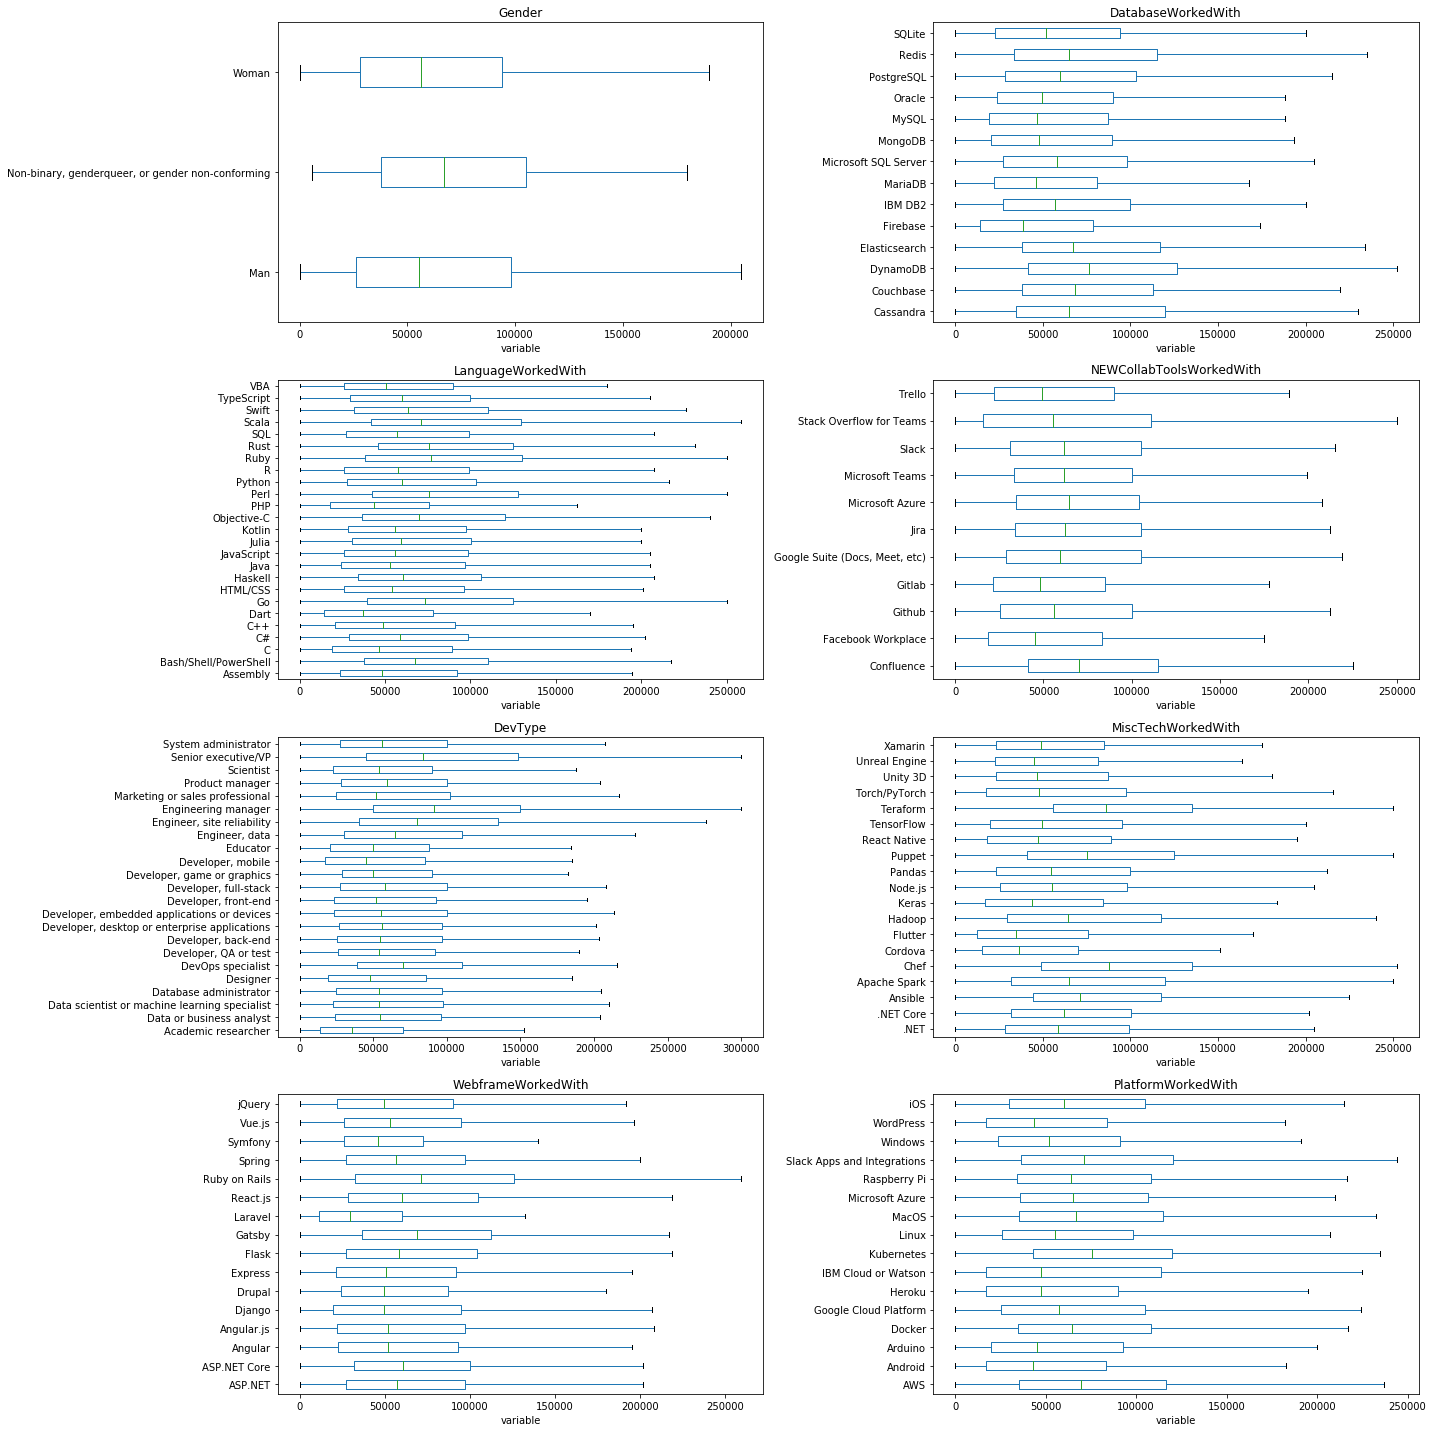

In [324]:
all_df=transform_data(df, numericals=all_numericals, categoricals=all_categoricals, multi_options=all_multi_options)

In [326]:
run_model(all_df)

(14656, 165) before trim
(14072, 164) after trim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.7948389917068731
RFR Test Score: -0.12526446345245024
LR Train Score: 0.057090228654151254
LR Test Score: 0.023838041259377496
[('Age1stCode', 0.04779962259552777), ('YearsCode', 0.04445585499855723), ('Age', 0.038838886427929015), ('LanguageWorkedWithCnt', 0.03875223698930745), ('YearsCodePro', 0.03640286292176287), ('NEWCollabToolsWorkedWithCnt', 0.035028184217513525), ('PlatformWorkedWithCnt', 0.02870374770305508), ('DevTypeCnt', 0.02548246361873686), ('DatabaseWorkedWithCnt', 0.02235235337512523), ('MiscTechWorkedWithCnt', 0.018335152838220747)]


(6456, 69)
(2969, 163)
(2969, 163) before trim
(2847, 162) after trim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8677858273462685
RFR Test Score: 0.3078646450939625


LinAlgError: SVD did not converge in Linear Least Squares

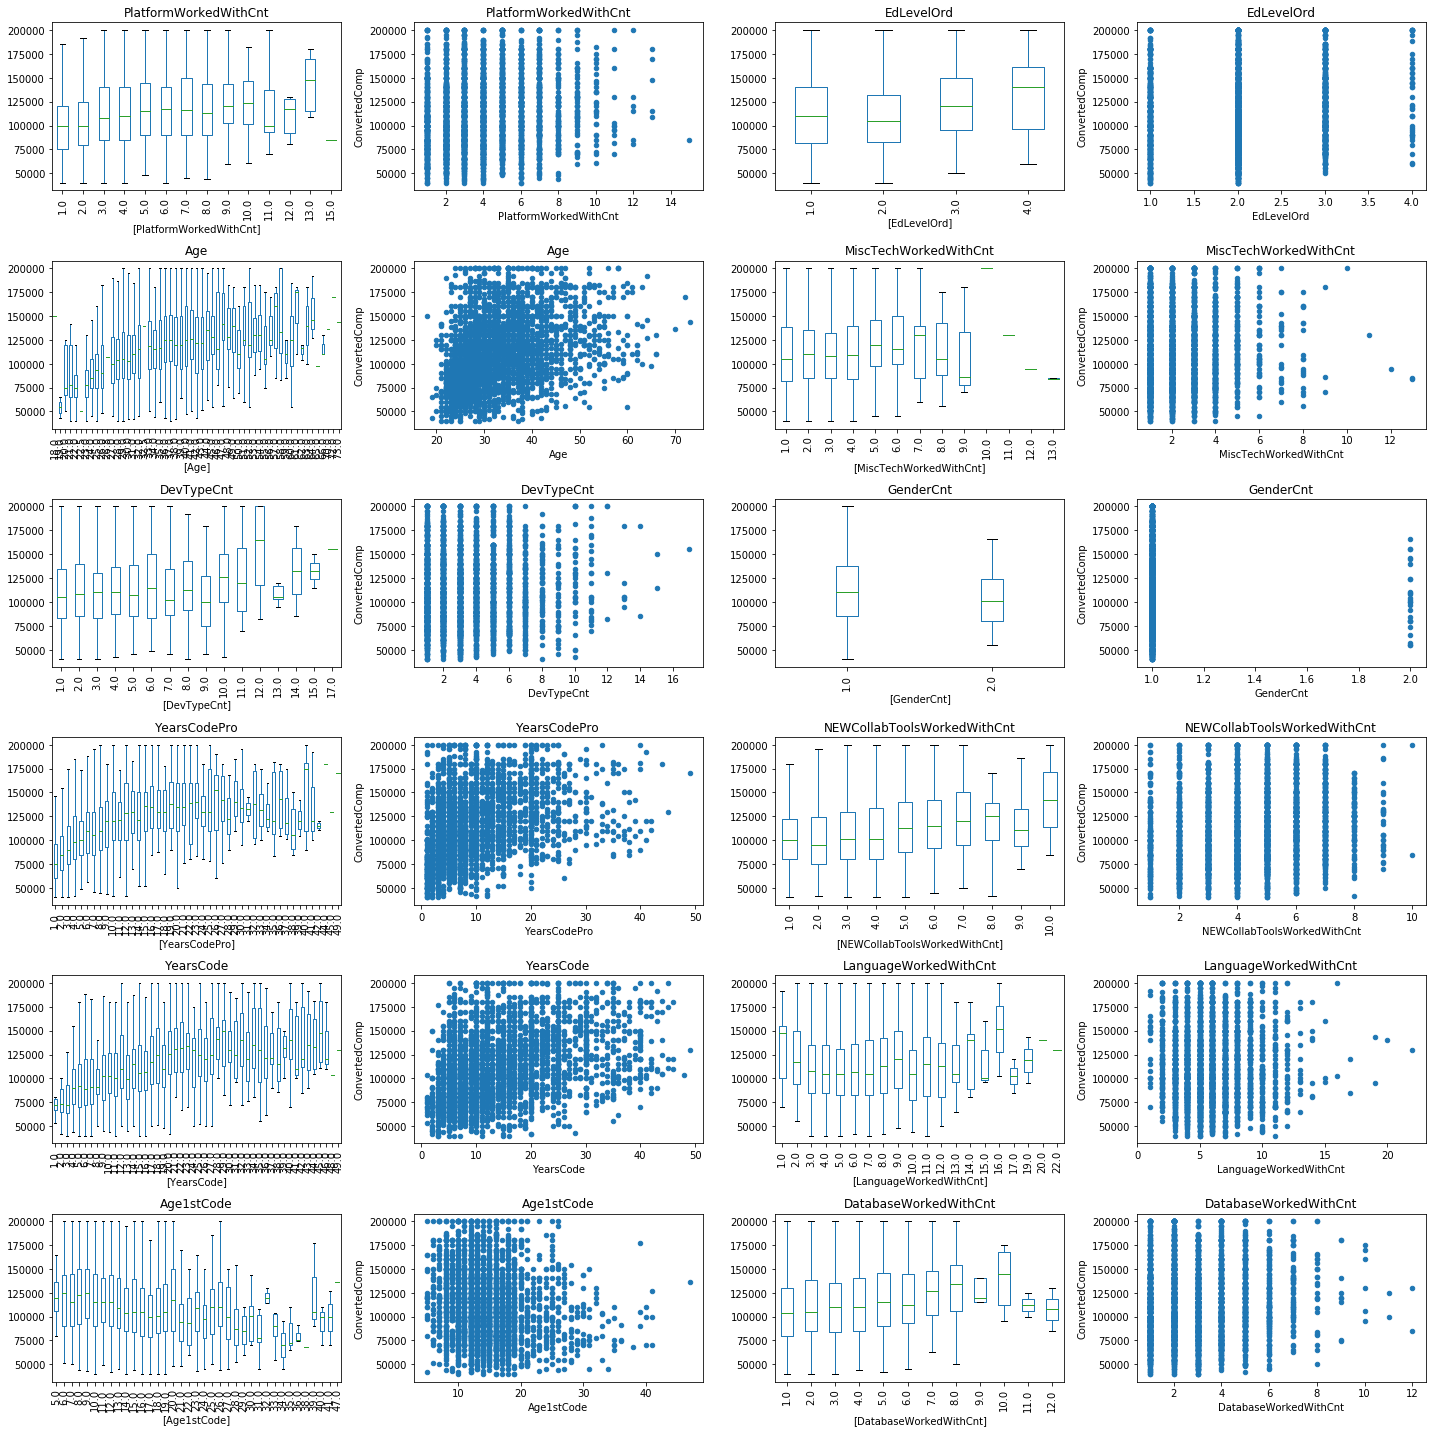

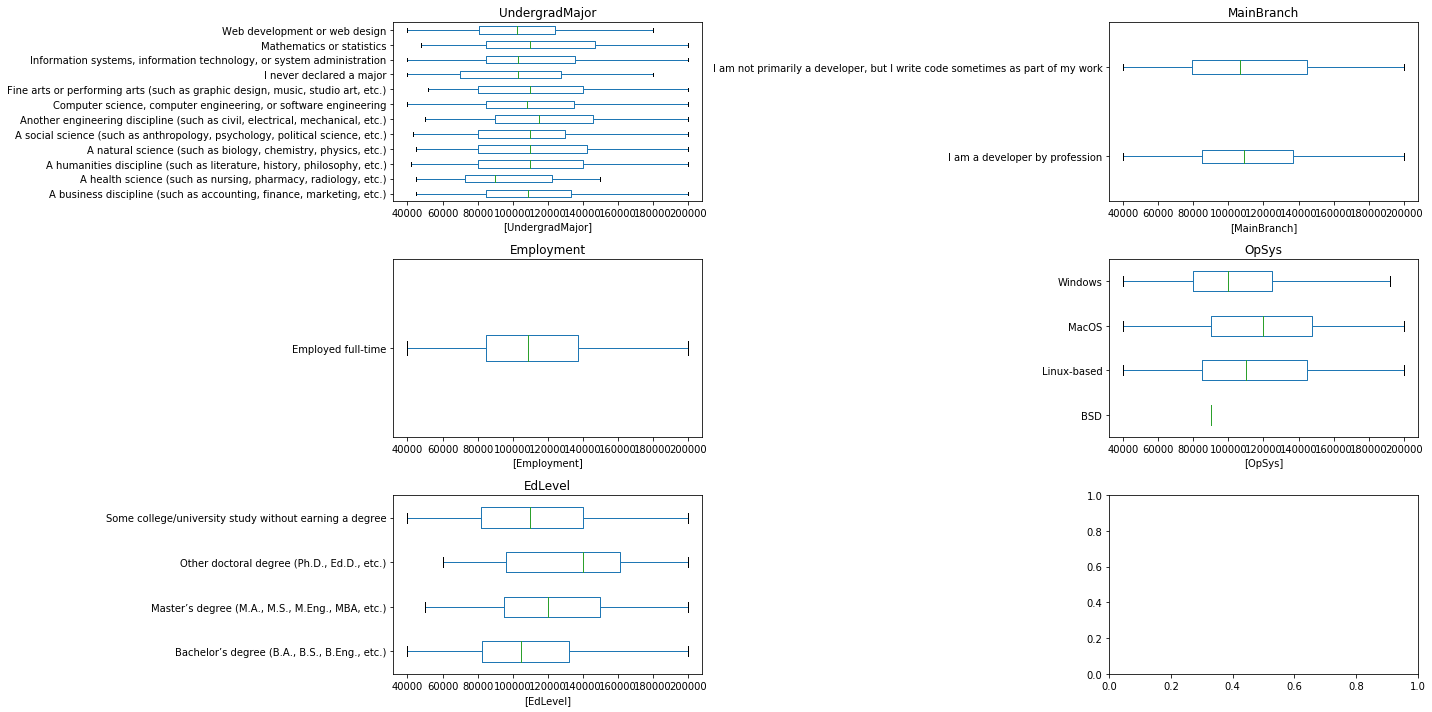

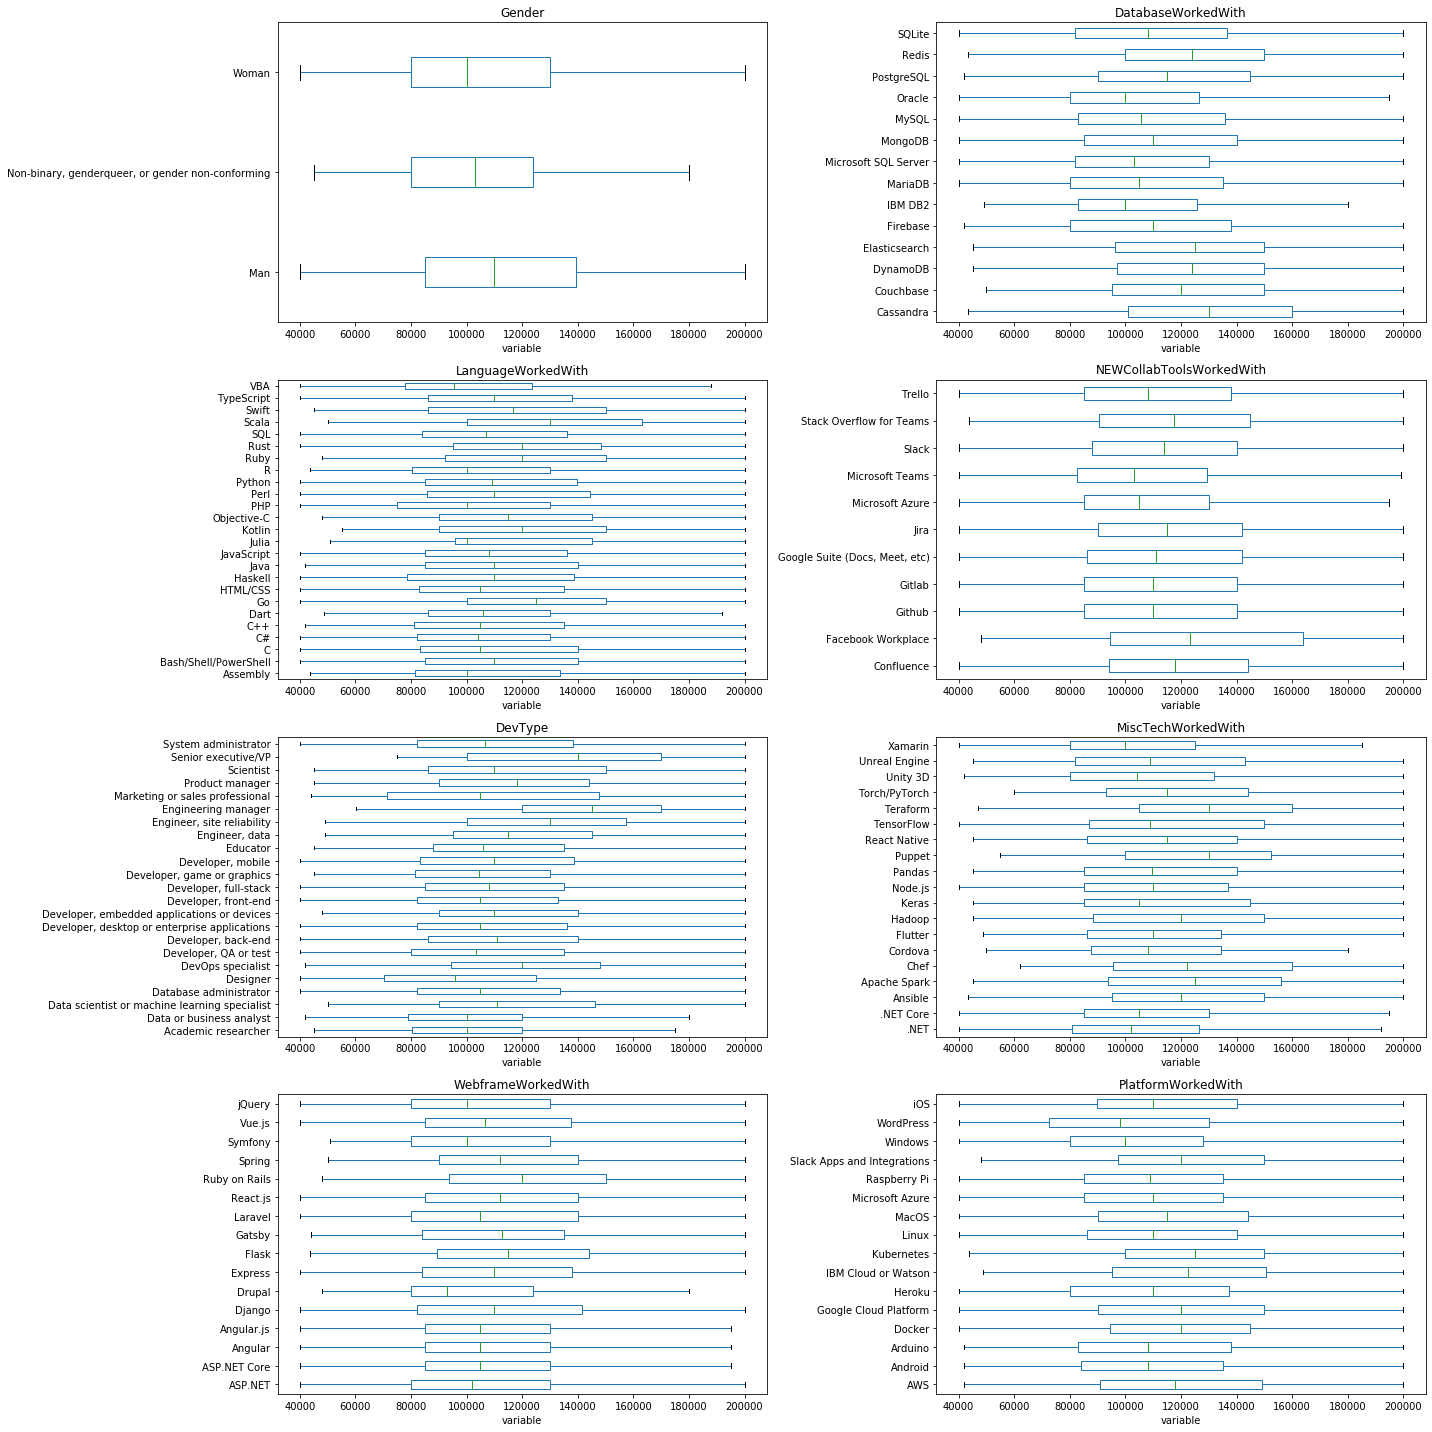

In [331]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df=transform_data(us, numericals=all_numericals, categoricals=all_categoricals, multi_options=all_multi_options)
us_df[all_numericals+['ConvertedComp']].corr().style.background_gradient(cmap="summer")
run_model(us_df)

(6456, 69)
(3149, 159)


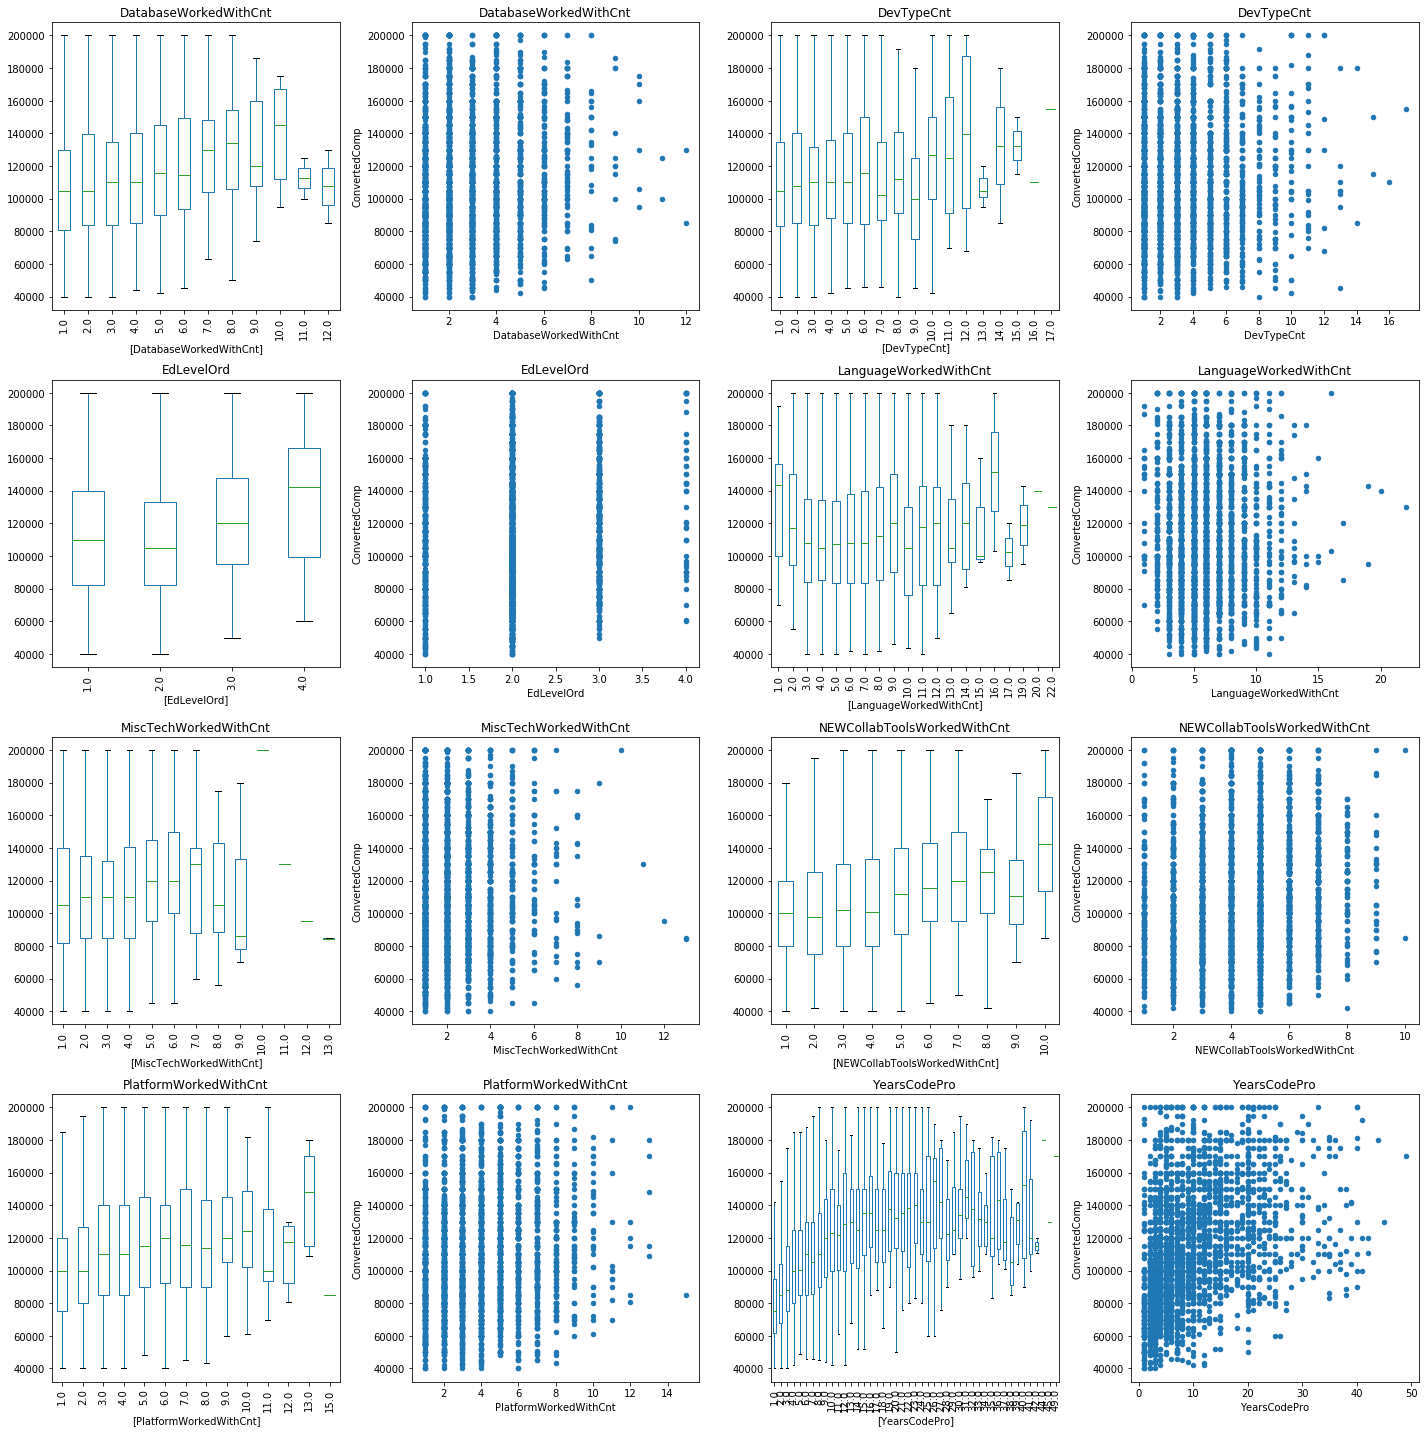

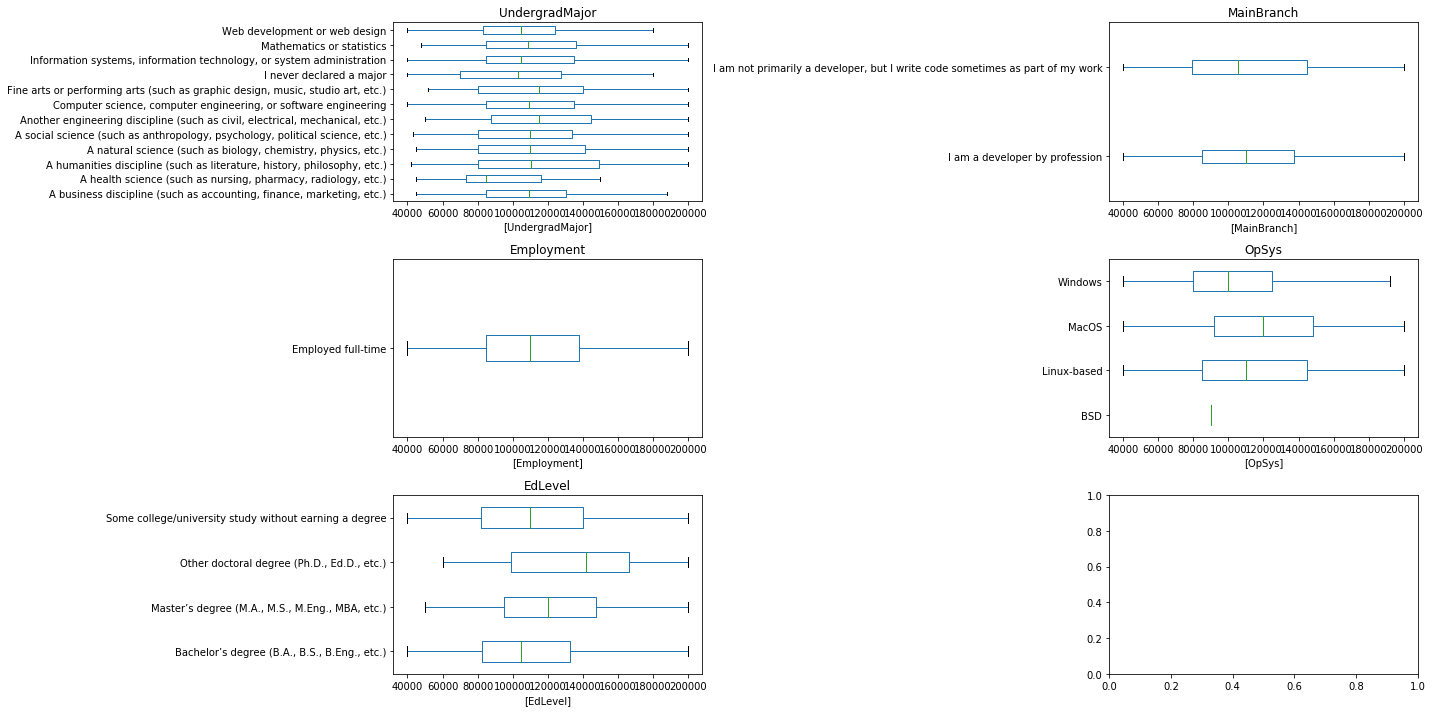

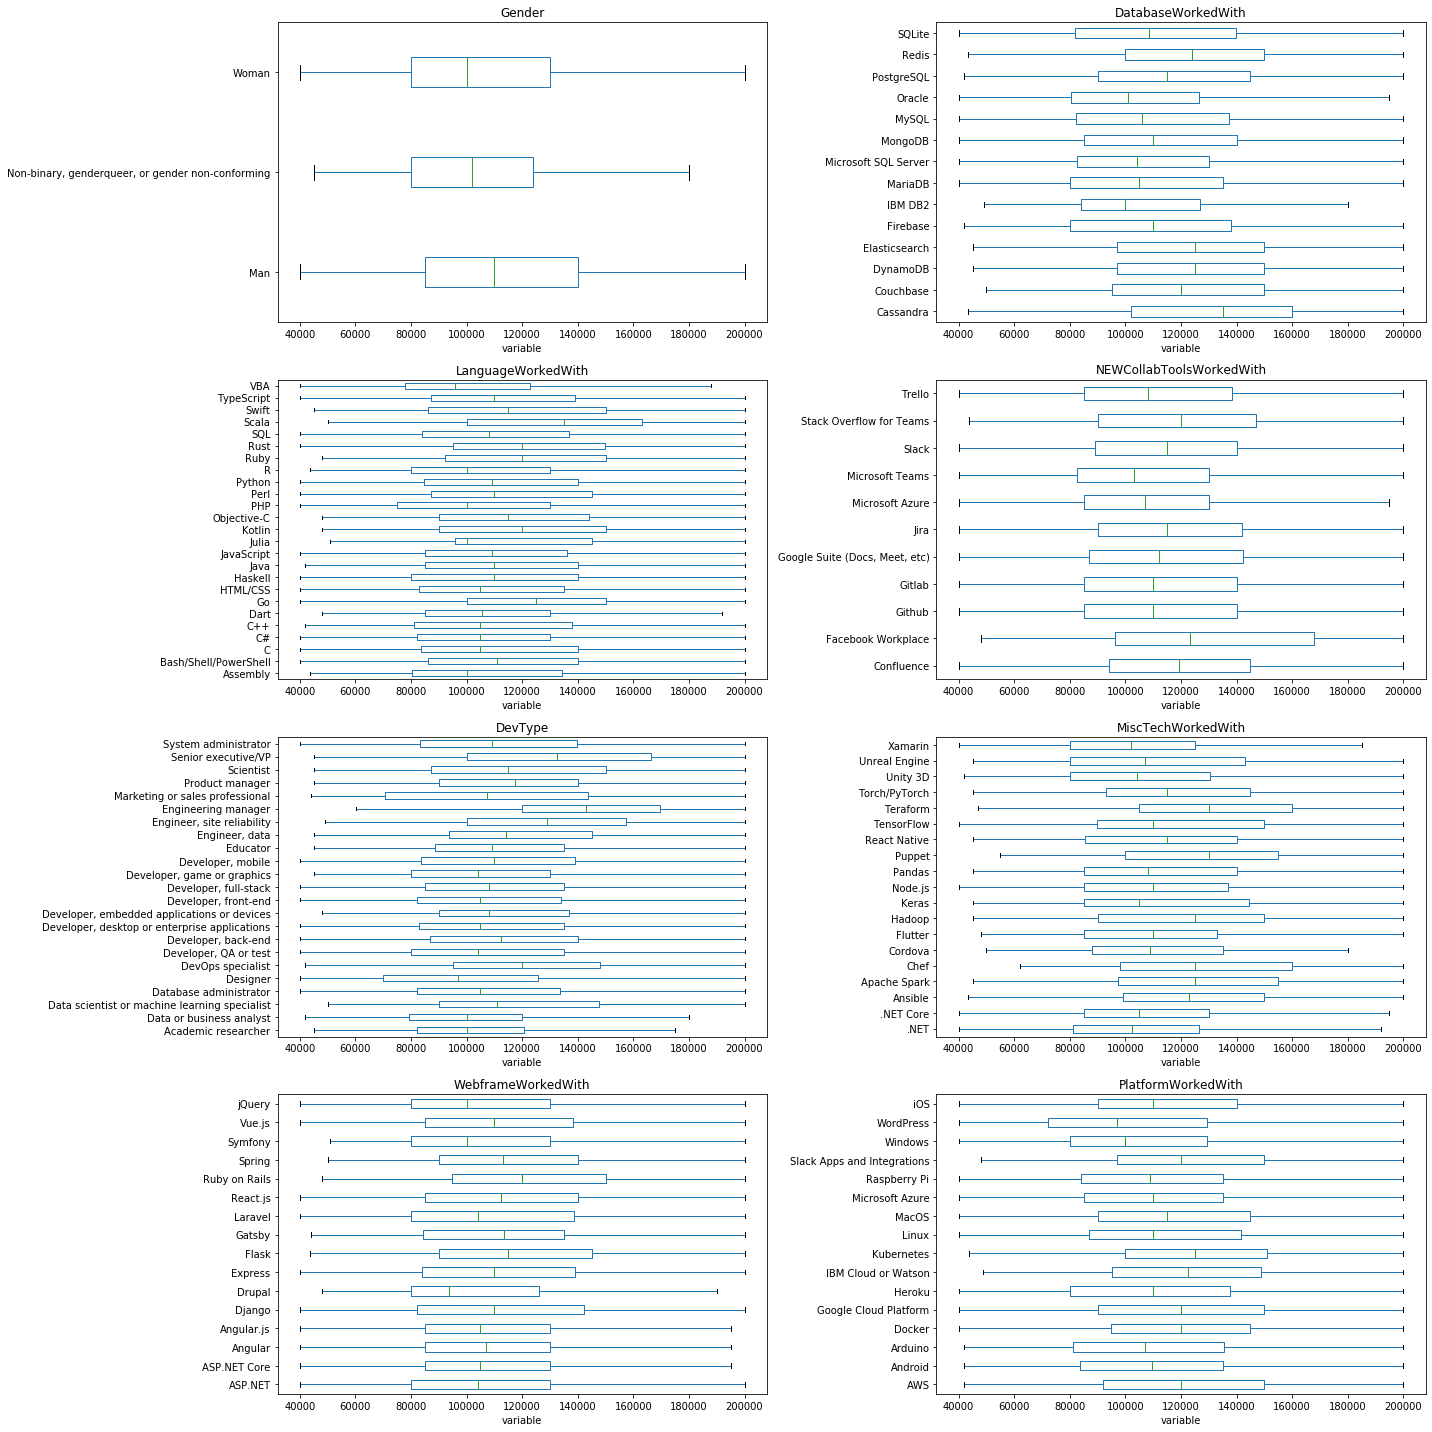

In [354]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['DatabaseWorkedWithCnt',
                                 'DevTypeCnt',
                                 'EdLevelOrd',
                                 'LanguageWorkedWithCnt',
                                 'MiscTechWorkedWithCnt',
                                 'NEWCollabToolsWorkedWithCnt',
                                 'PlatformWorkedWithCnt',
                                 'YearsCodePro'], 
                     categoricals=all_categoricals, multi_options=all_multi_options)
us_df_limited[['DatabaseWorkedWithCnt',
      'DevTypeCnt',
      'EdLevelOrd',
      'LanguageWorkedWithCnt',
      'MiscTechWorkedWithCnt',
      'NEWCollabToolsWorkedWithCnt',
      'PlatformWorkedWithCnt',
      'YearsCodePro', 
      'ConvertedComp']].corr().style.background_gradient(cmap="summer")

In [334]:
run_model(us_df_limited)

(3149, 159) before trim
(3039, 158) after trim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8738685993338484
RFR Test Score: 0.30340865127702177
LR Train Score: 0.4077909351518
LR Test Score: 0.34647345909360994
[('YearsCodePro', 0.2252881837574446), ('Windows', 0.03605967921239924), ('LanguageWorkedWithCnt', 0.026151362182044852), ('NEWCollabToolsWorkedWithCnt', 0.025603729468507454), ('jQuery', 0.023383312825292497), ('DevTypeCnt', 0.01914394450509347), ('PlatformWorkedWithCnt', 0.01837878704708135), ('DatabaseWorkedWithCnt', 0.01573705408600645), ('MiscTechWorkedWithCnt', 0.015133834488545333), ('Confluence', 0.014622518292046444)]


(6456, 69)
(3312, 135)


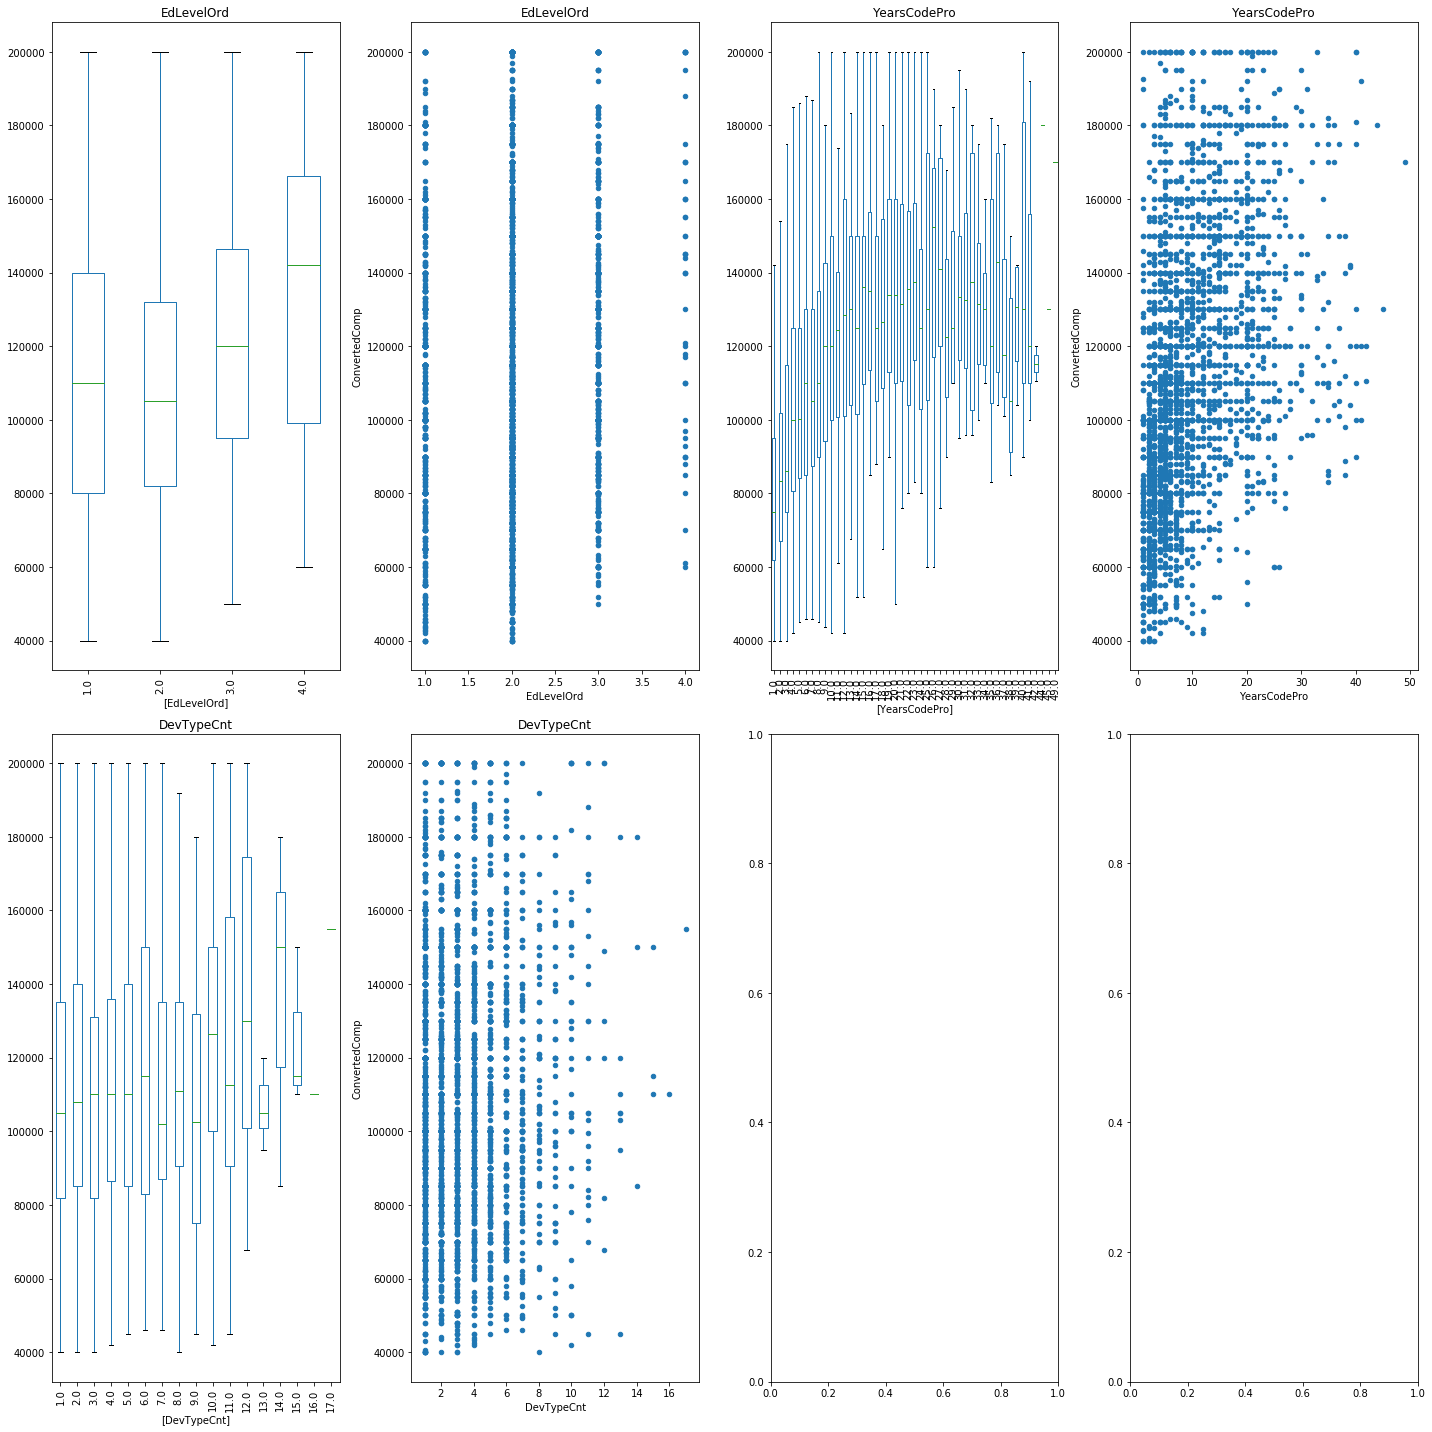

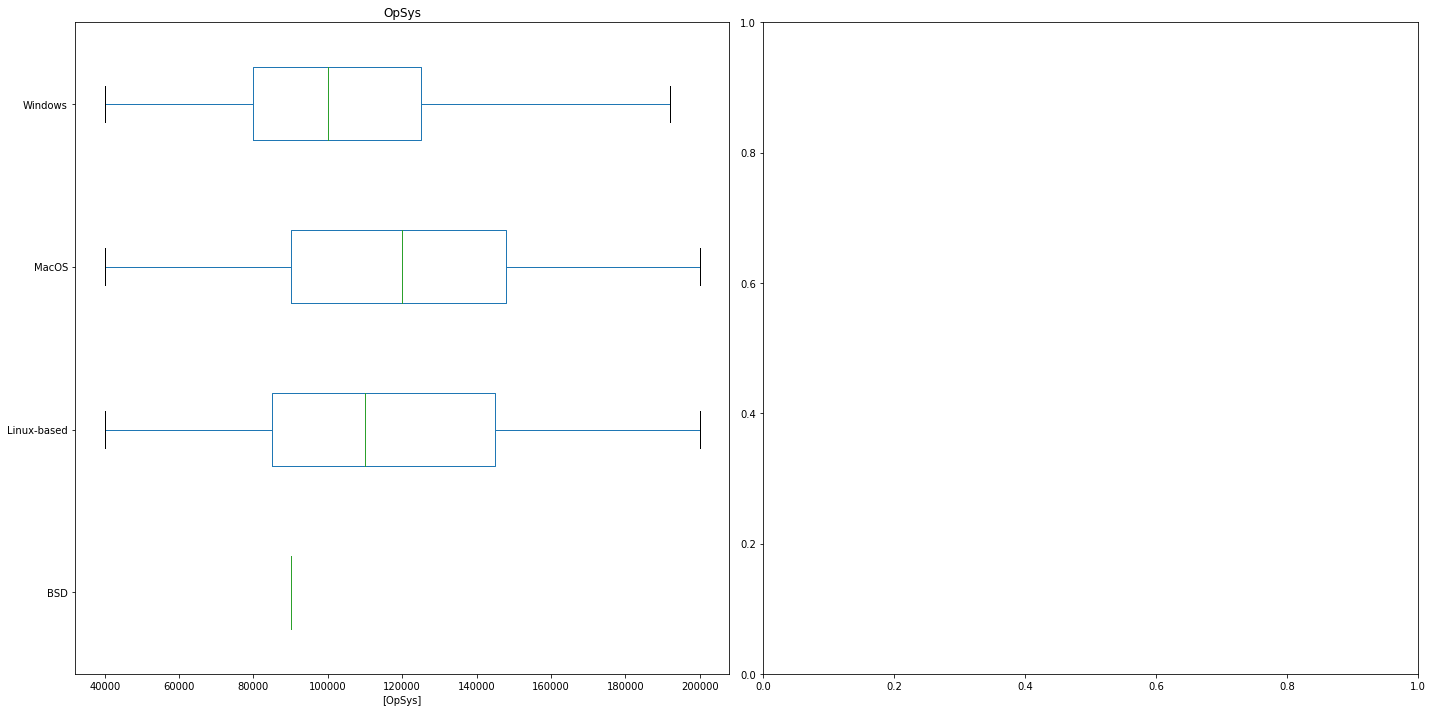

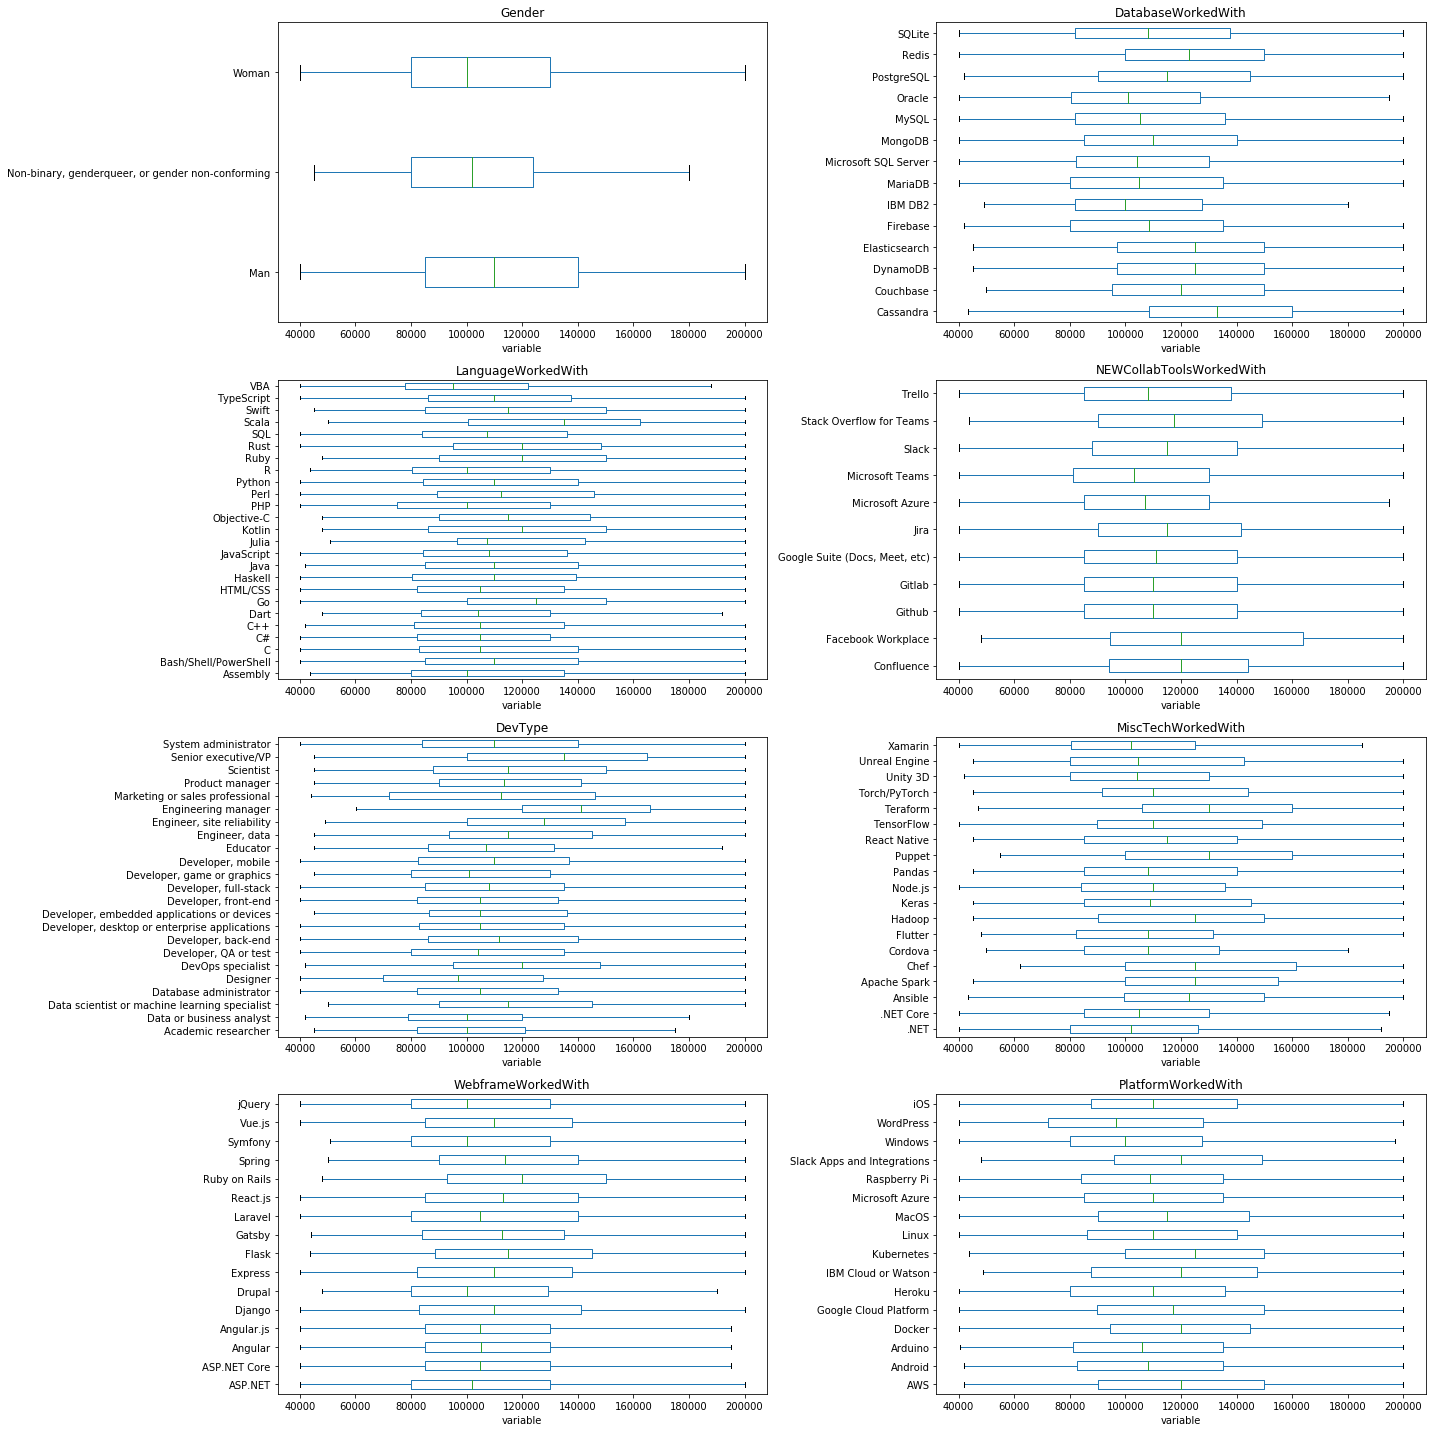

In [347]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['EdLevelOrd',
                                 'YearsCodePro', 
                                 'DevTypeCnt'], 
                     categoricals=['OpSys'], multi_options=all_multi_options)

In [349]:
run_model(us_df_limited)

(3312, 135) before trim
(3197, 134) after trim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8693498972211584
RFR Test Score: 0.315281361075781
LR Train Score: 0.41605504785811875
LR Test Score: 0.3178511489398156
[('YearsCodePro', 0.2557514518346428), ('DevTypeCnt', 0.02555199718581757), ('Confluence', 0.022091898746977017), ('Windows', 0.019627390402428335), ('Docker', 0.017801697028770918), ('Teraform', 0.01689762751686218), ('jQuery', 0.016562799720110304), ('Engineering manager', 0.016310100039146264), ('EdLevelOrd', 0.01552193298069885), ('PHP', 0.015465357817309434)]


(6456, 69)
(3521, 142)


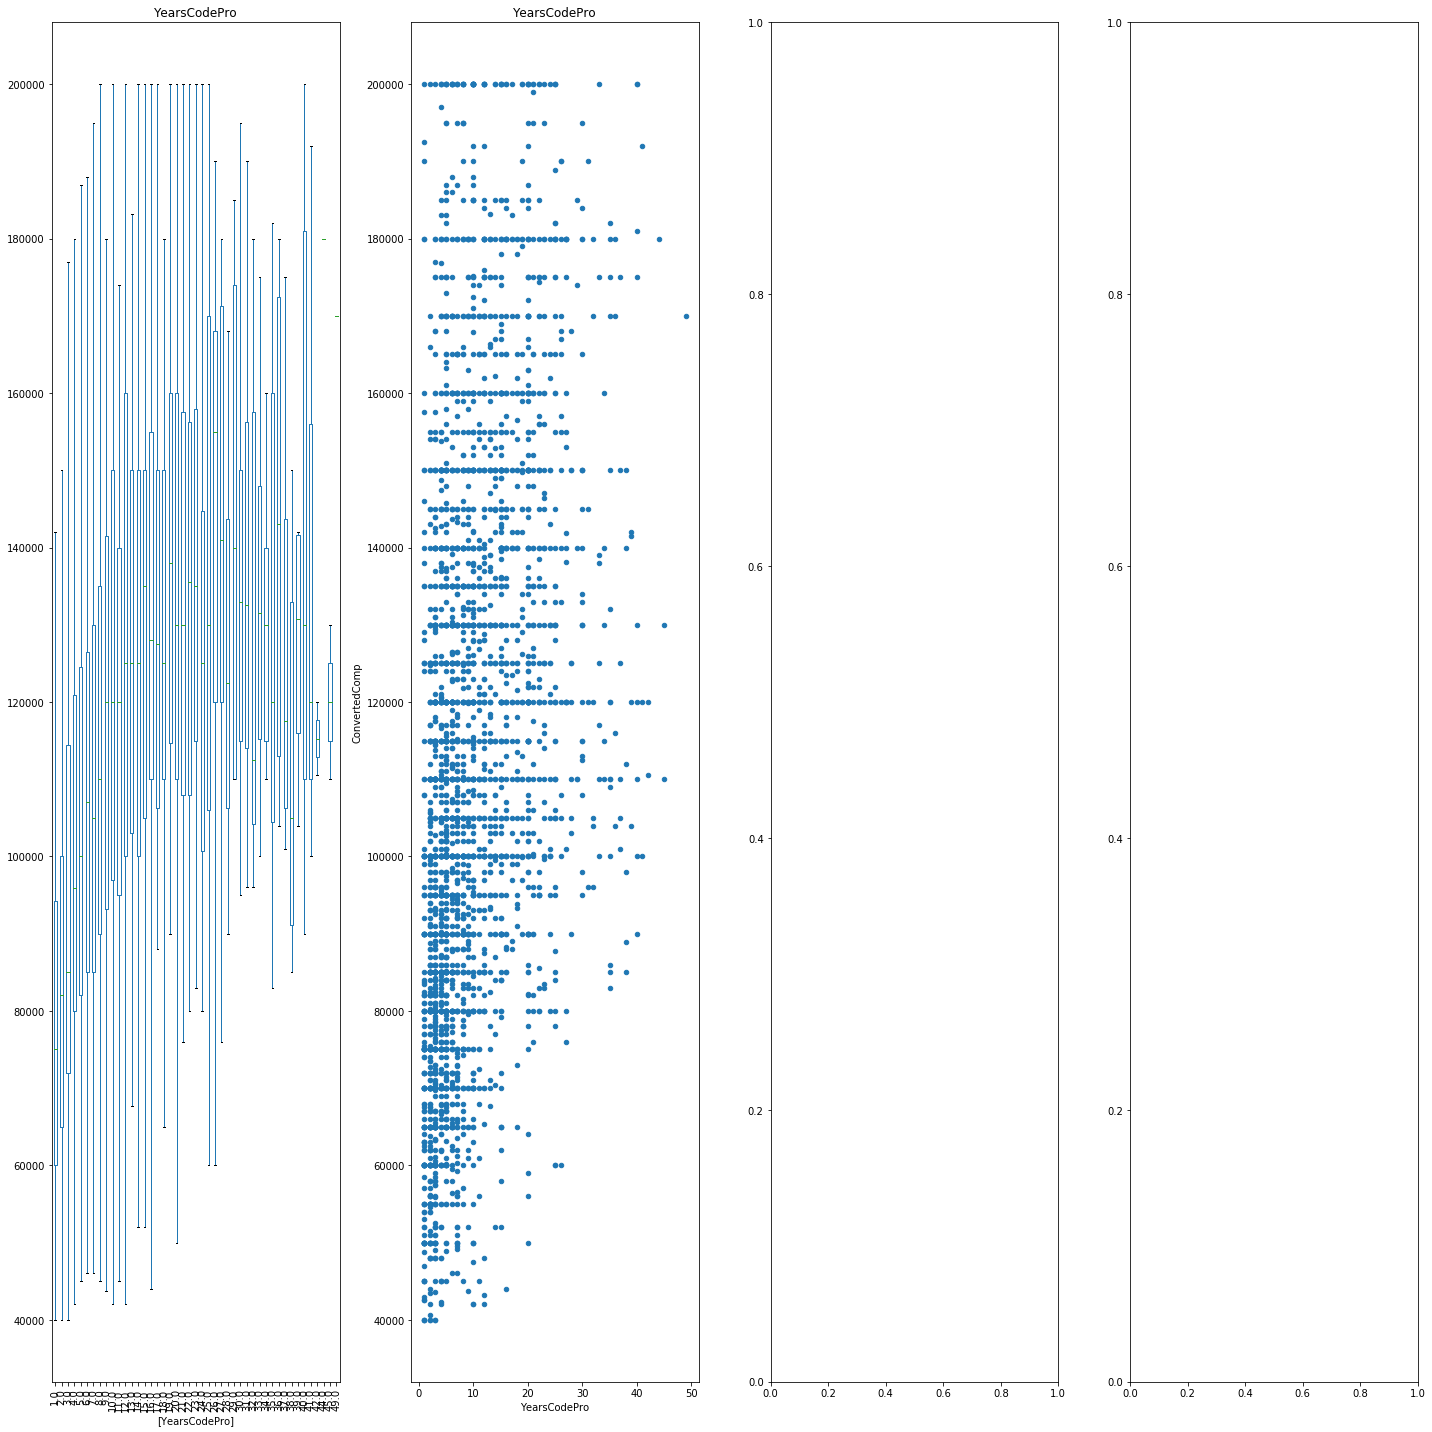

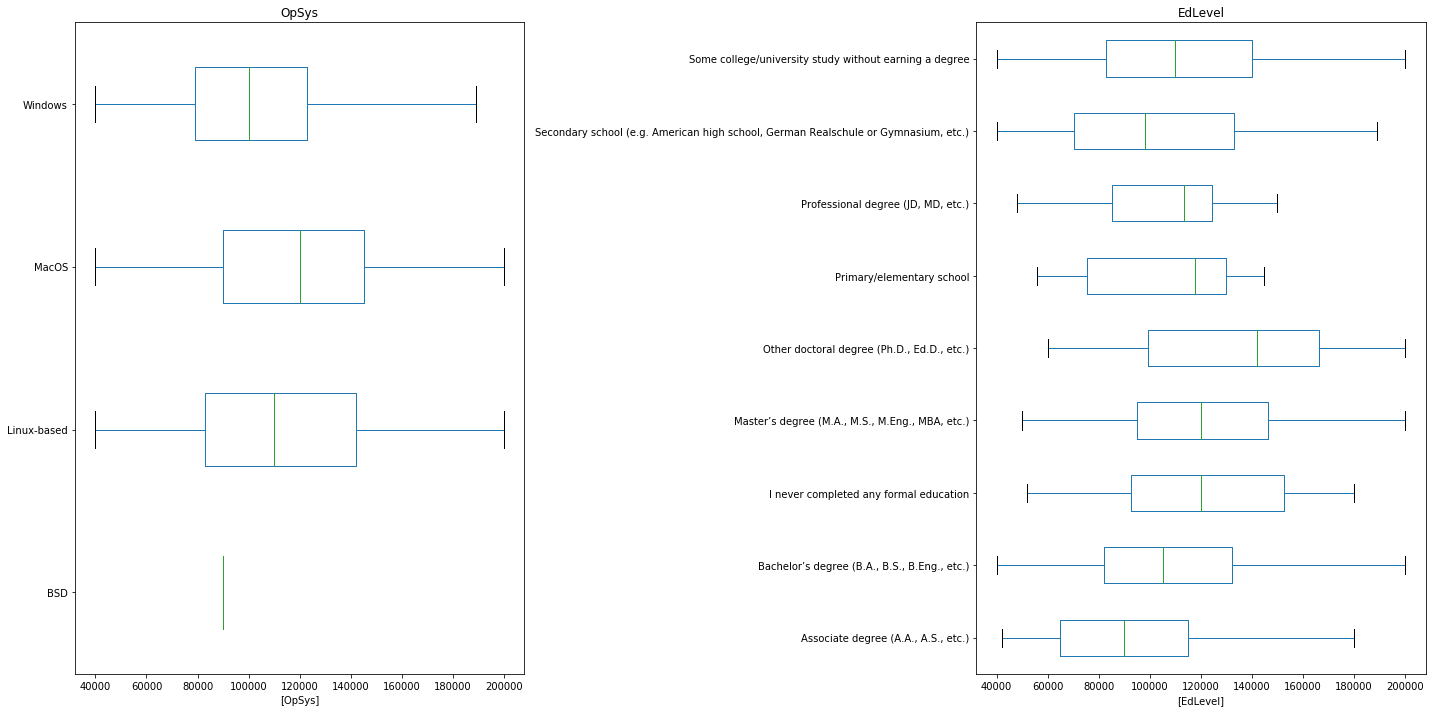

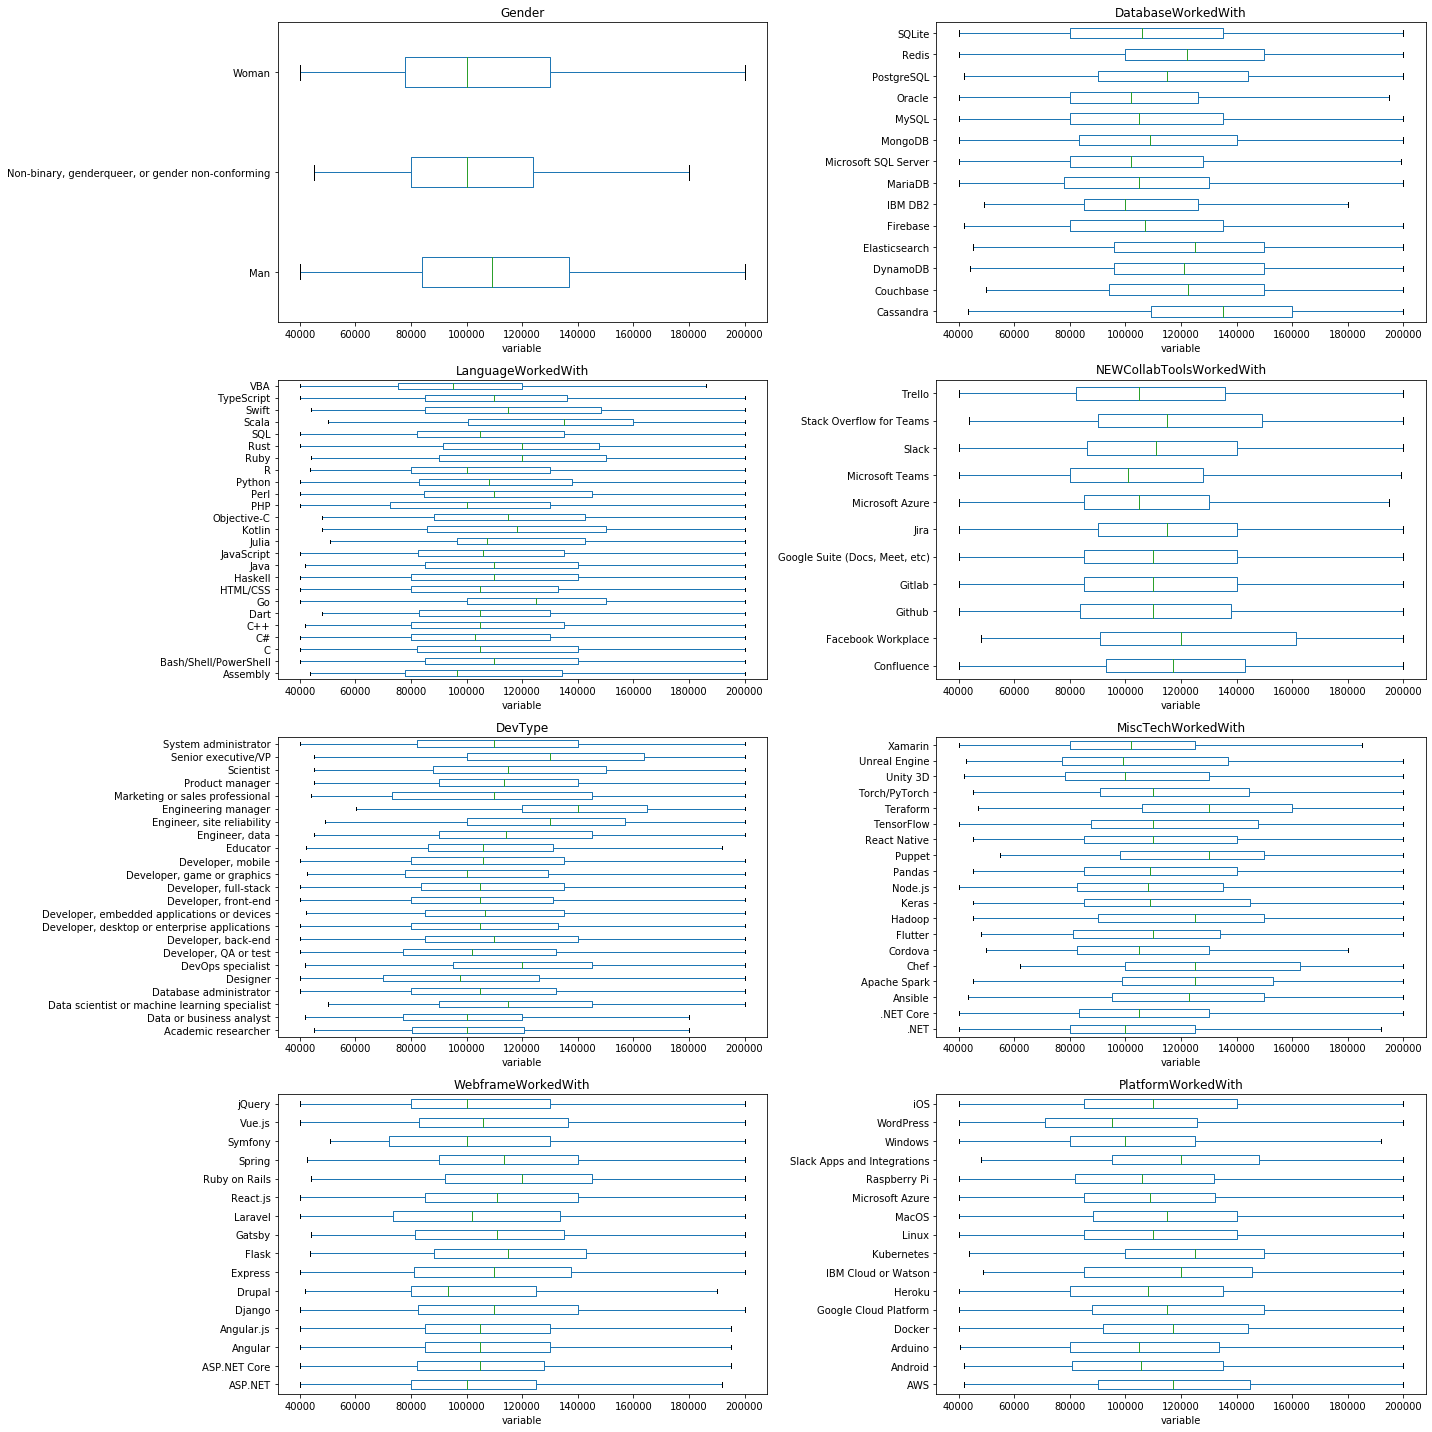

In [364]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro'], 
                     categoricals=['OpSys', 'EdLevel'], 
                     multi_options=all_multi_options)

In [366]:
run_model(us_df_limited)

(3521, 142) before trim
(3398, 141) after trim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8740987502291855
RFR Test Score: 0.31241491879334027
LR Train Score: 0.4229778150936455
LR Test Score: 0.33933403380307536
[('YearsCodePro', 0.24302169942107668), ('Windows', 0.027283530626694315), ('PHP', 0.022901365012156668), ('MacOS', 0.022333240859440766), ('.NET', 0.018299871189807956), ('Redis', 0.01632390943519448), ('Engineering manager', 0.015955581714988523), ('Confluence', 0.015613928184574405), ('Kubernetes', 0.013111243211799215), ('Jira', 0.012922323043133316)]


(6456, 69)
(3521, 143)


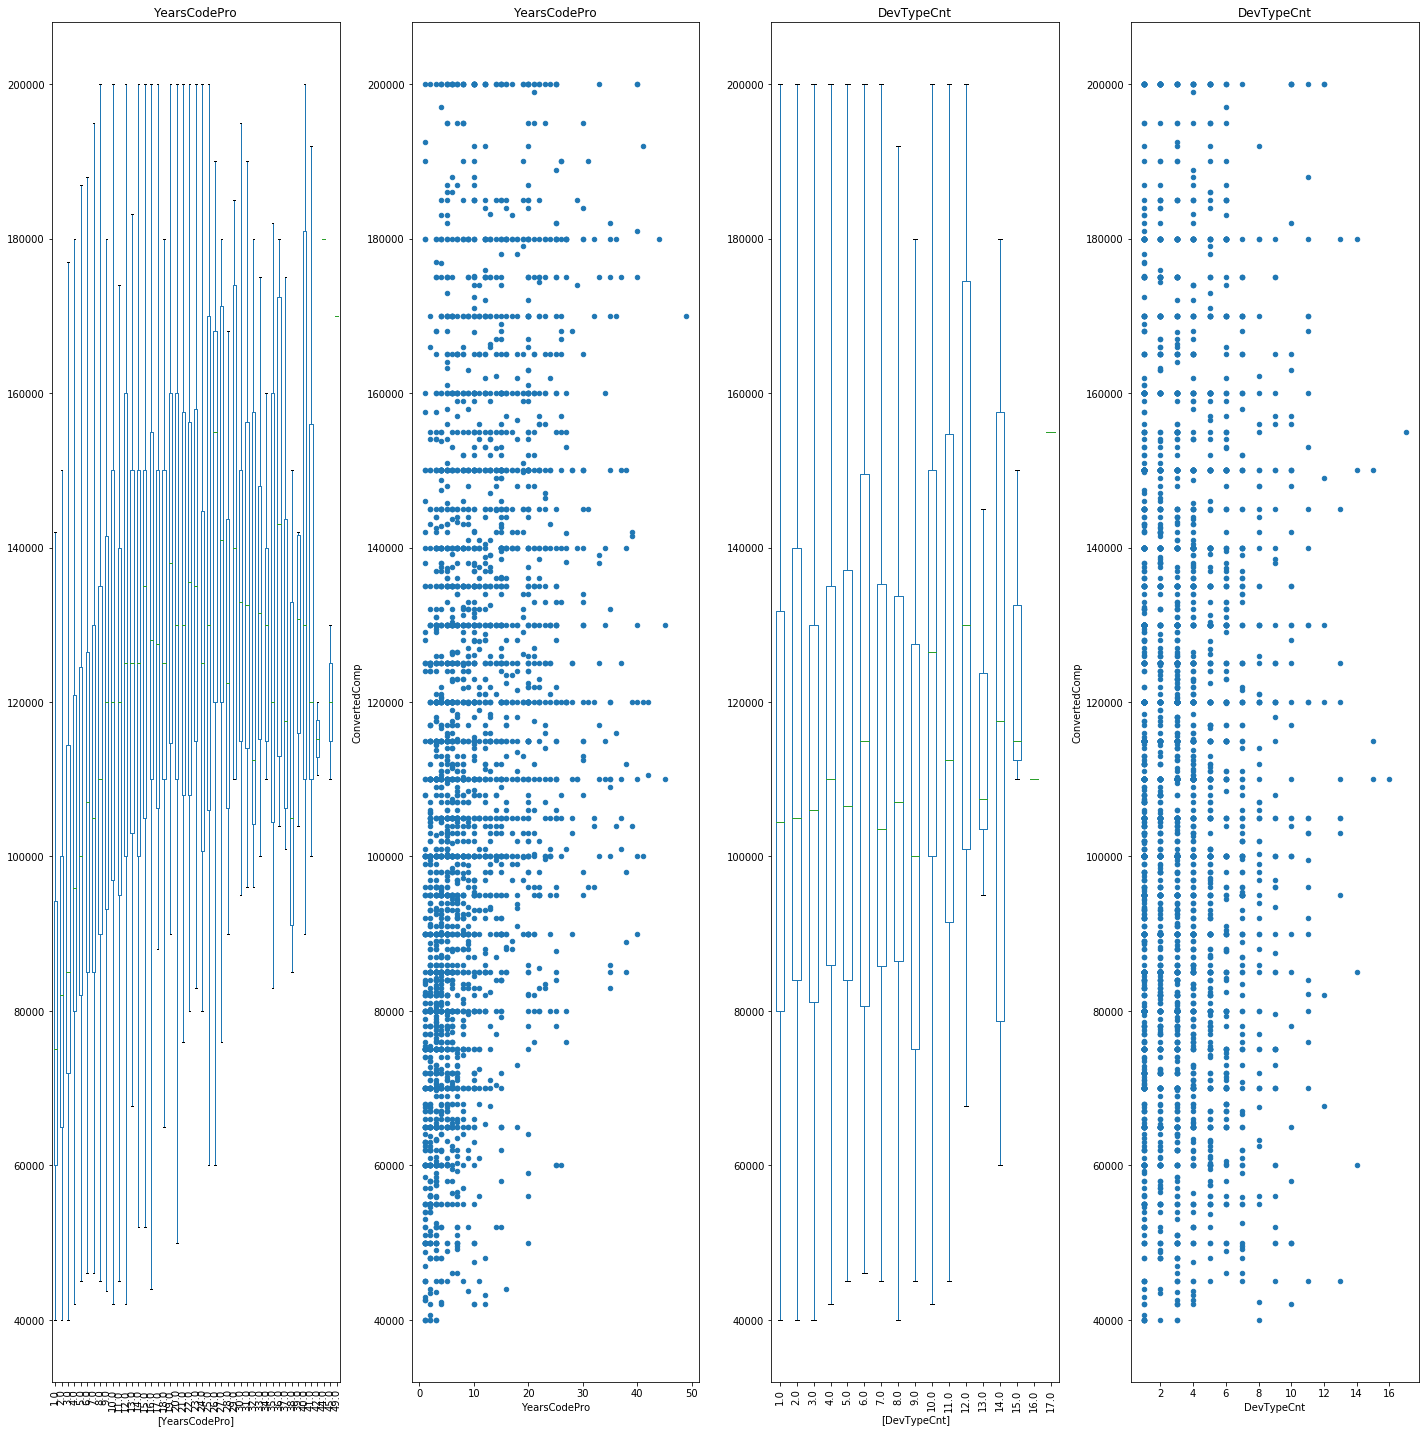

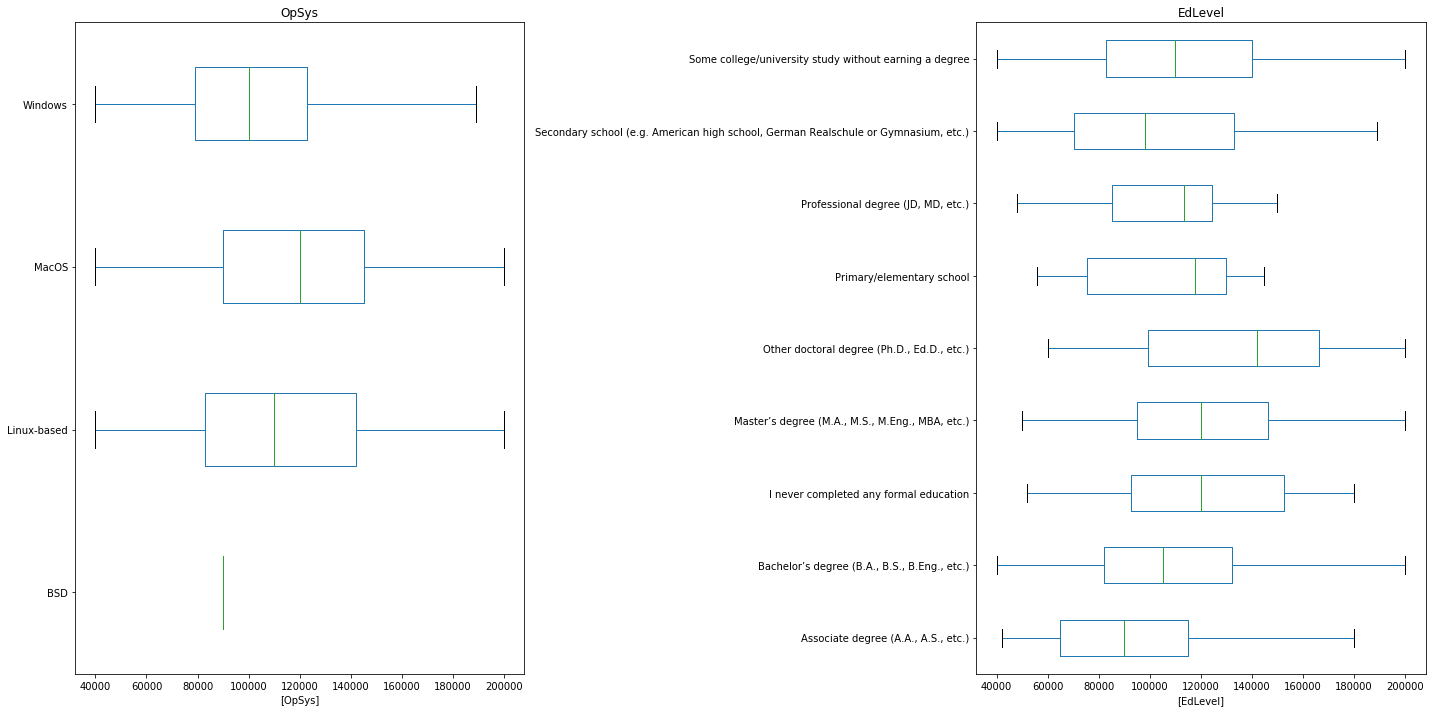

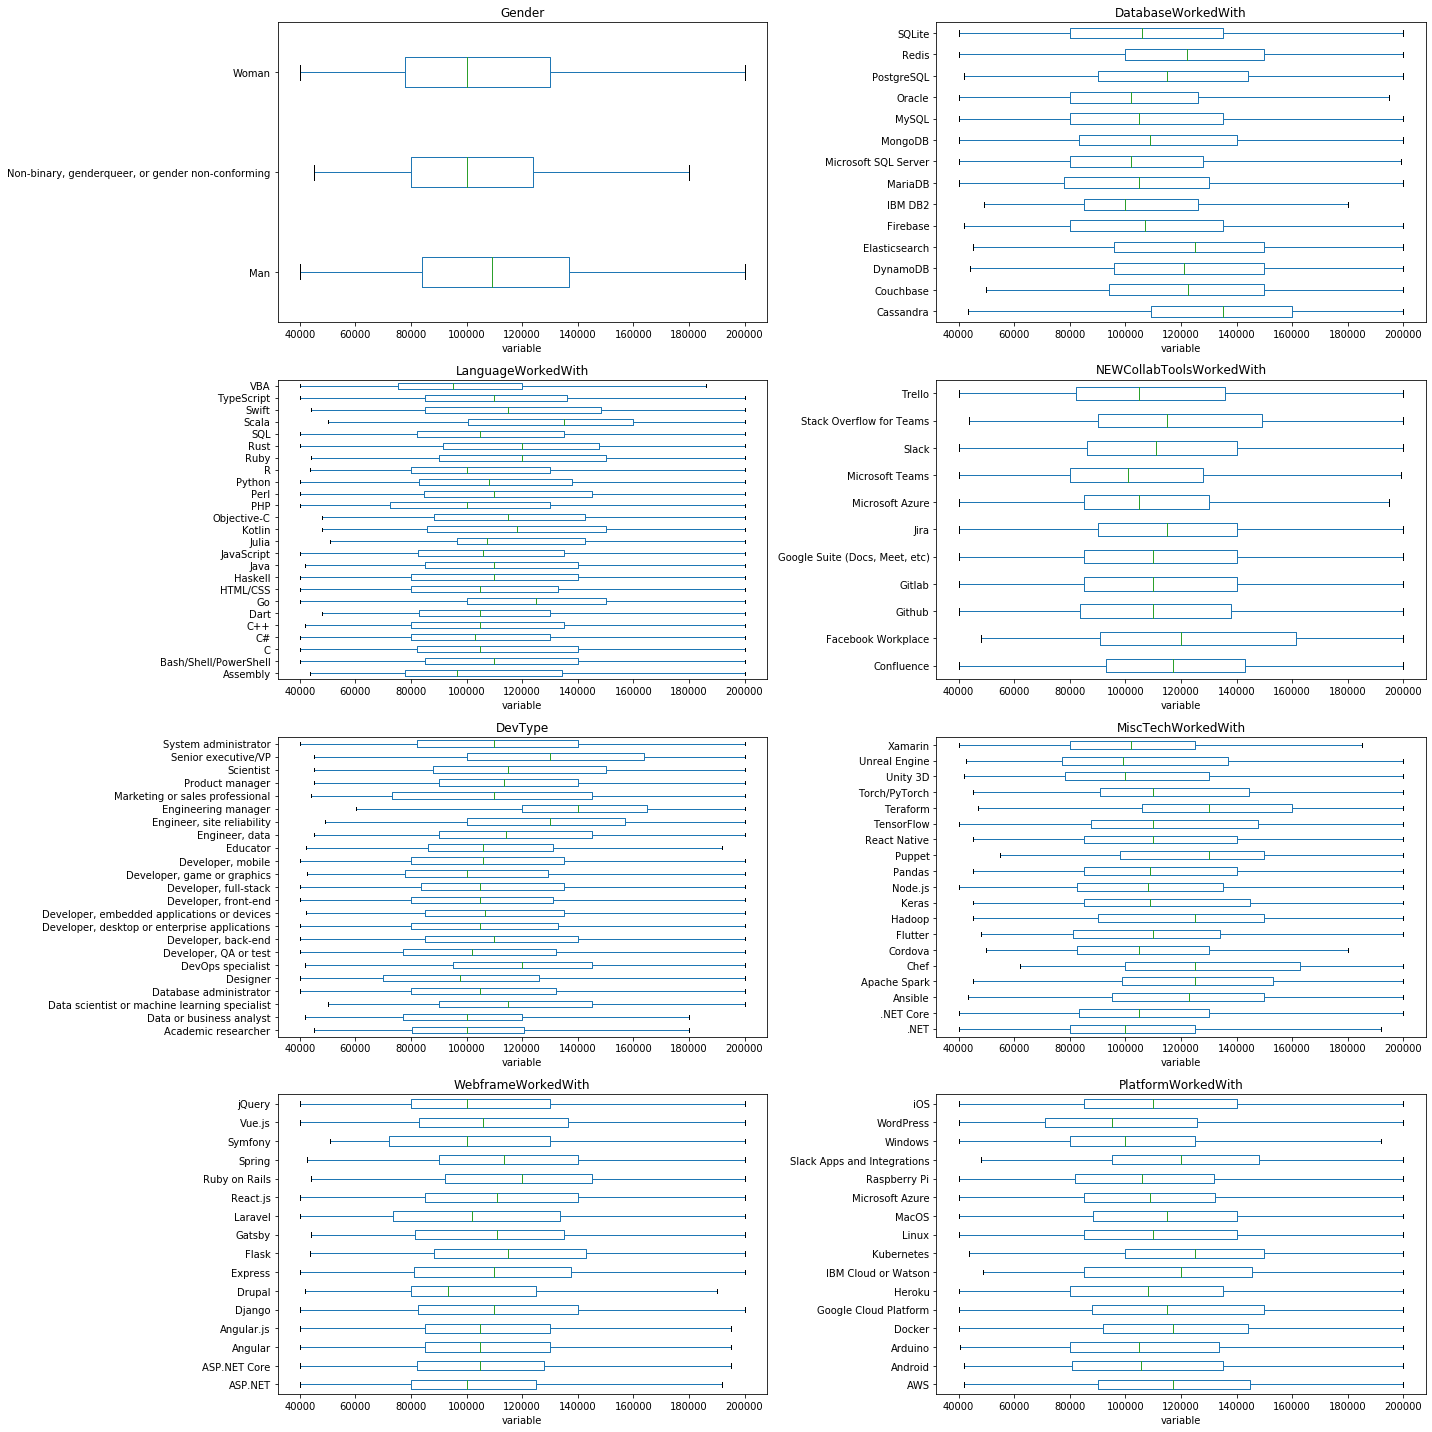

In [350]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro', 
                                 'DevTypeCnt'], 
                     categoricals=['OpSys', 'EdLevel'], multi_options=all_multi_options)

In [352]:
run_model(us_df_limited)

(3521, 143) before trim
(3398, 142) after trim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8775030928058728
RFR Test Score: 0.33066436365066104
LR Train Score: 0.4190946482057492
LR Test Score: 0.36216273651574804
[('YearsCodePro', 0.21876654033252996), ('Windows', 0.03263928995062856), ('Engineering manager', 0.025526368662058953), ('DevTypeCnt', 0.022662262539973926), ('Docker', 0.02101354148201865), ('Confluence', 0.019492981900849898), ('Jira', 0.016532020811264366), ('Redis', 0.015408806427284434), ('WordPress', 0.015106326918532621), ('jQuery', 0.013445840746249741)]


(6456, 69)
(6102, 39)


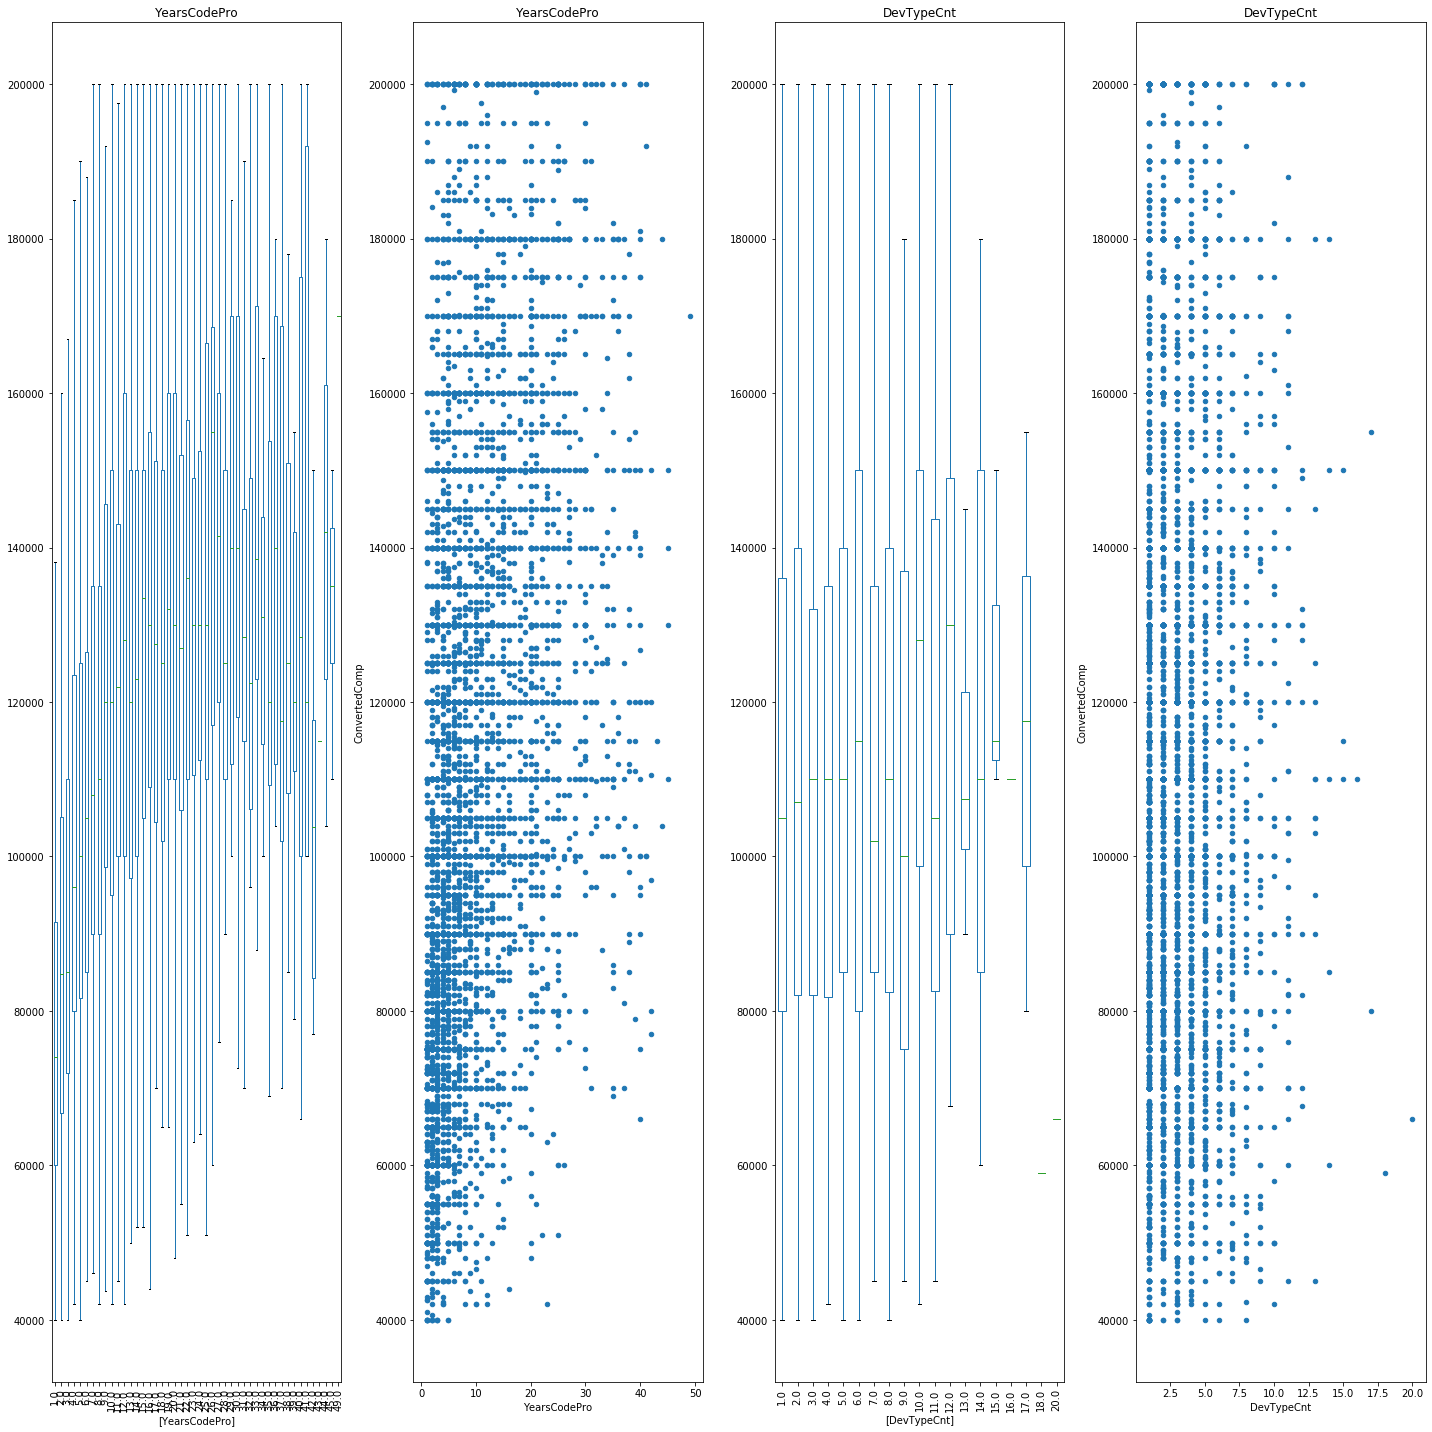

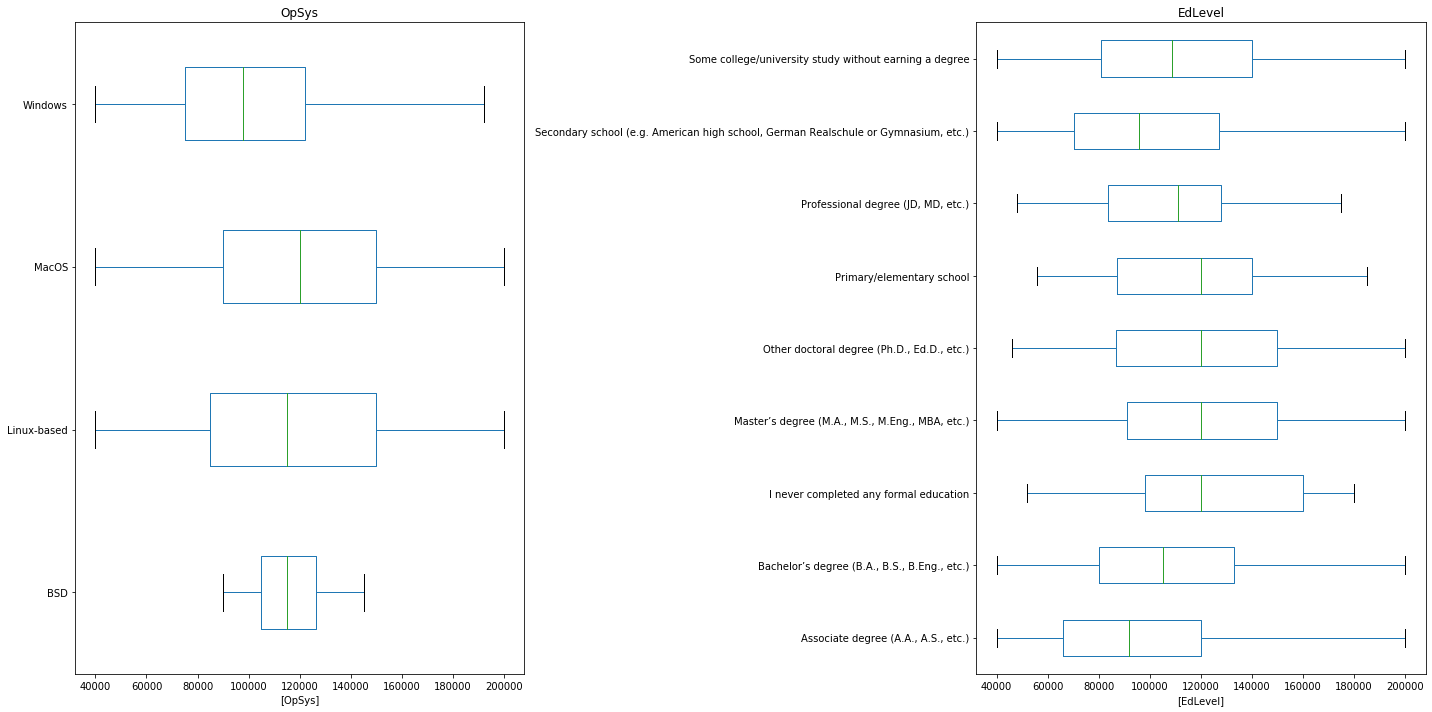

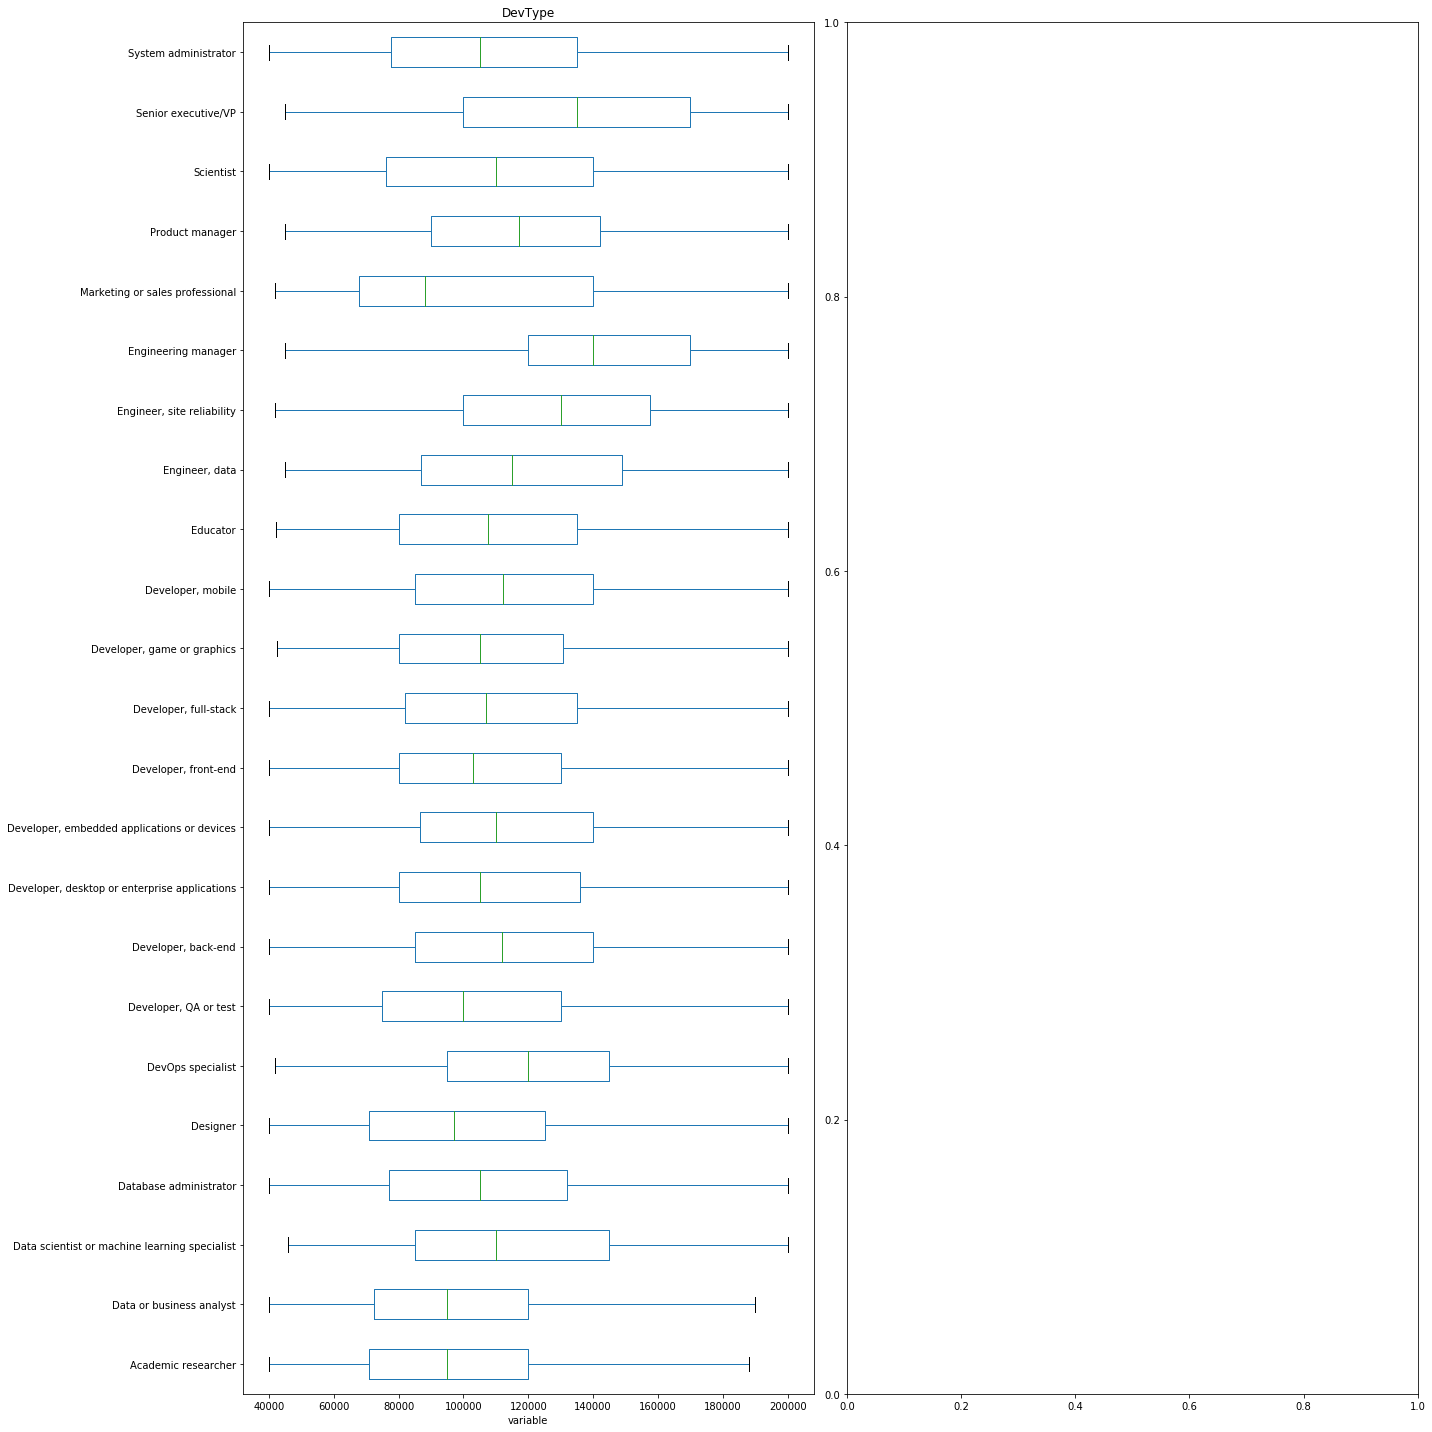

In [367]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro', 
                                 'DevTypeCnt'], 
                     categoricals=['OpSys', 'EdLevel'], 
                     multi_options=['DevType'])

In [369]:
run_model(us_df_limited)

(6102, 39) before trim
(5888, 38) after trim
RFR Train Score: 0.7568264790798581
RFR Test Score: 0.18098925605155403
LR Train Score: 0.2988883010920571
LR Test Score: 0.3199756606935037
[('YearsCodePro', 0.3288984418523093), ('DevTypeCnt', 0.09416637887029705), ('Windows', 0.07713249610646804), ('Developer, full-stack', 0.02942179868563806), ('Developer, back-end', 0.029054845008462213), ('Developer, front-end', 0.026490221787515093), ('Developer, desktop or enterprise applications', 0.024286713340546145), ('Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 0.023457163570483323), ('Developer, mobile', 0.022808763546701367), ('Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 0.022407705138665628)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro'], 
                     categoricals=['EdLevel', 'OpSys'], 
                     multi_options=['DevType'])

In [375]:
run_model(us_df_limited)

(6102, 38) before trim
(5888, 37) after trim
RFR Train Score: 0.7541119786798098
RFR Test Score: 0.1740857531505231
LR Train Score: 0.30493272501174795
LR Test Score: 0.30466124480086876
[('YearsCodePro', 0.3273747887481366), ('Windows', 0.06986731891367985), ('Developer, back-end', 0.040148076811064574), ('Developer, full-stack', 0.03580571318823329), ('Developer, front-end', 0.035178681960820204), ('Developer, desktop or enterprise applications', 0.03252862340144071), ('Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 0.027466300384475763), ('DevOps specialist', 0.026523498346526054), ('Developer, mobile', 0.026259832226892425), ('Engineering manager', 0.024497692415250284)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(6456, 69)
(6325, 34)


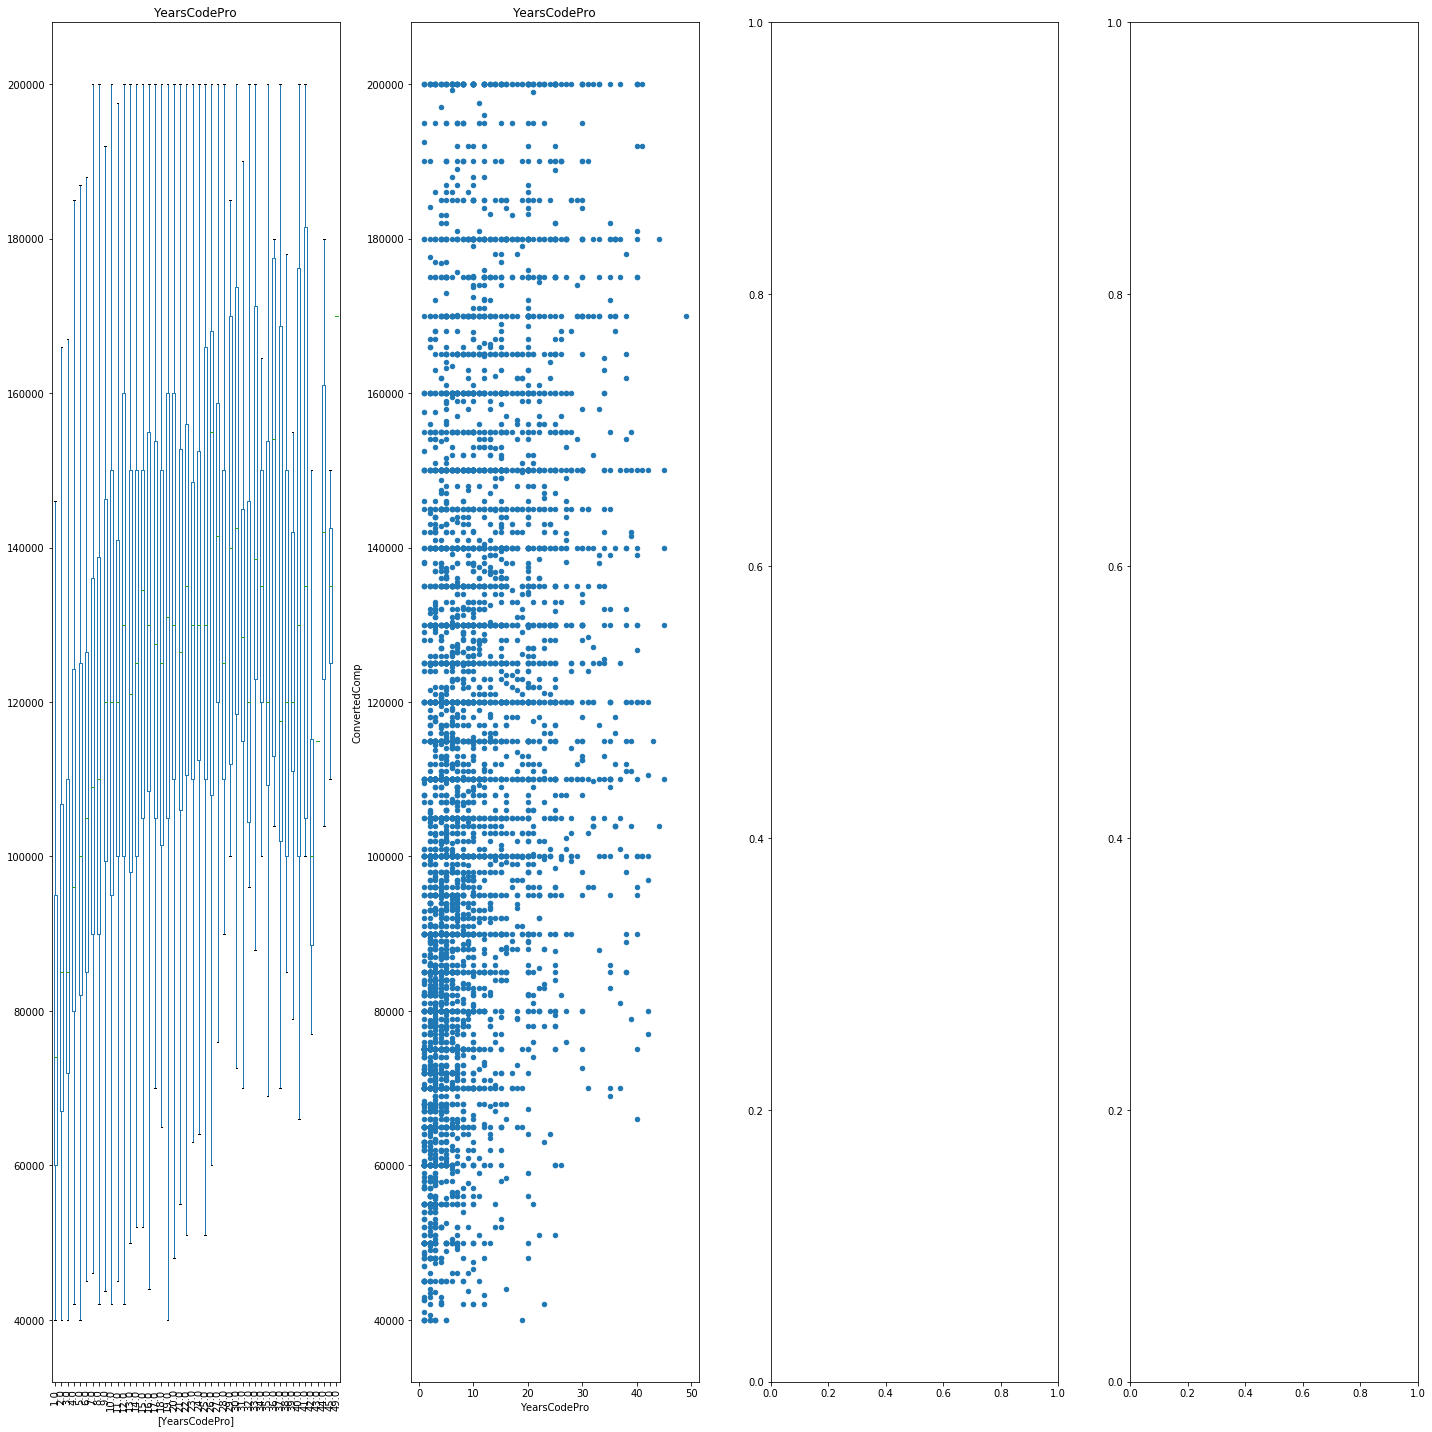

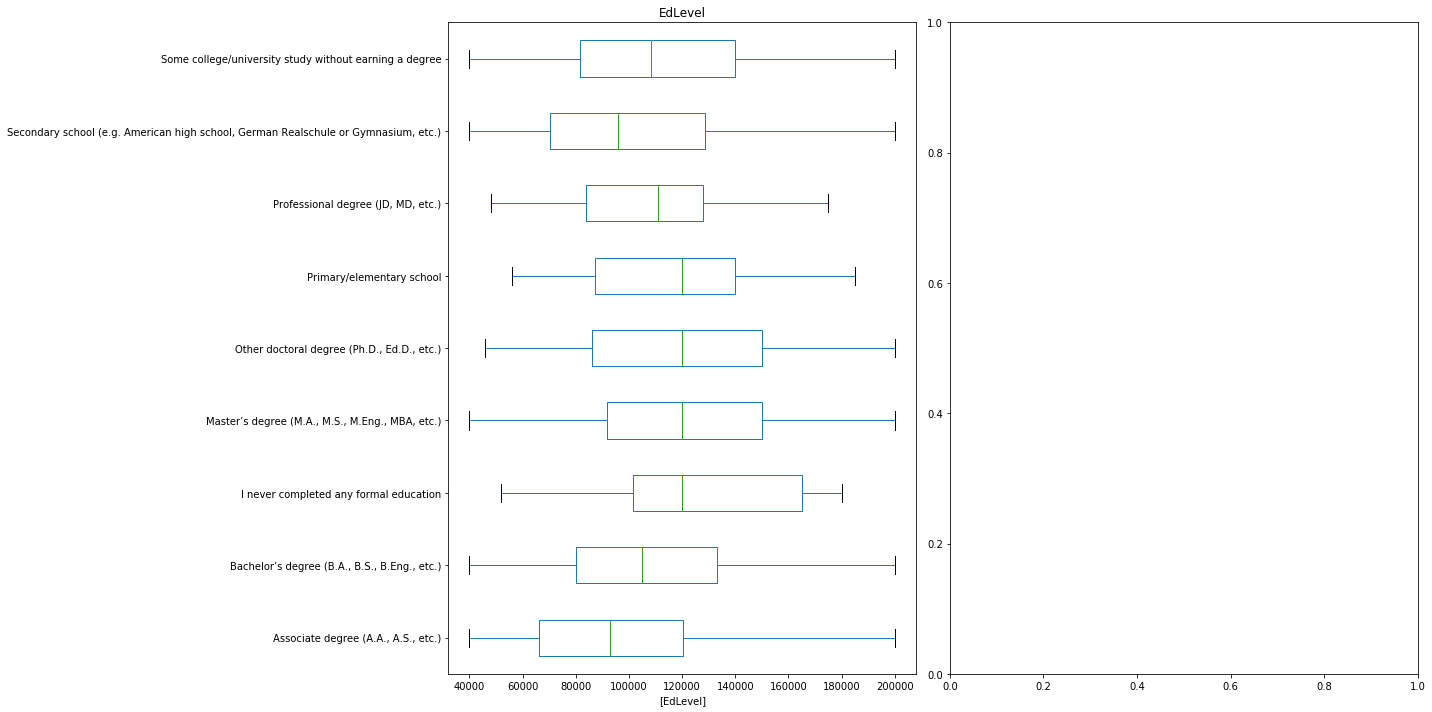

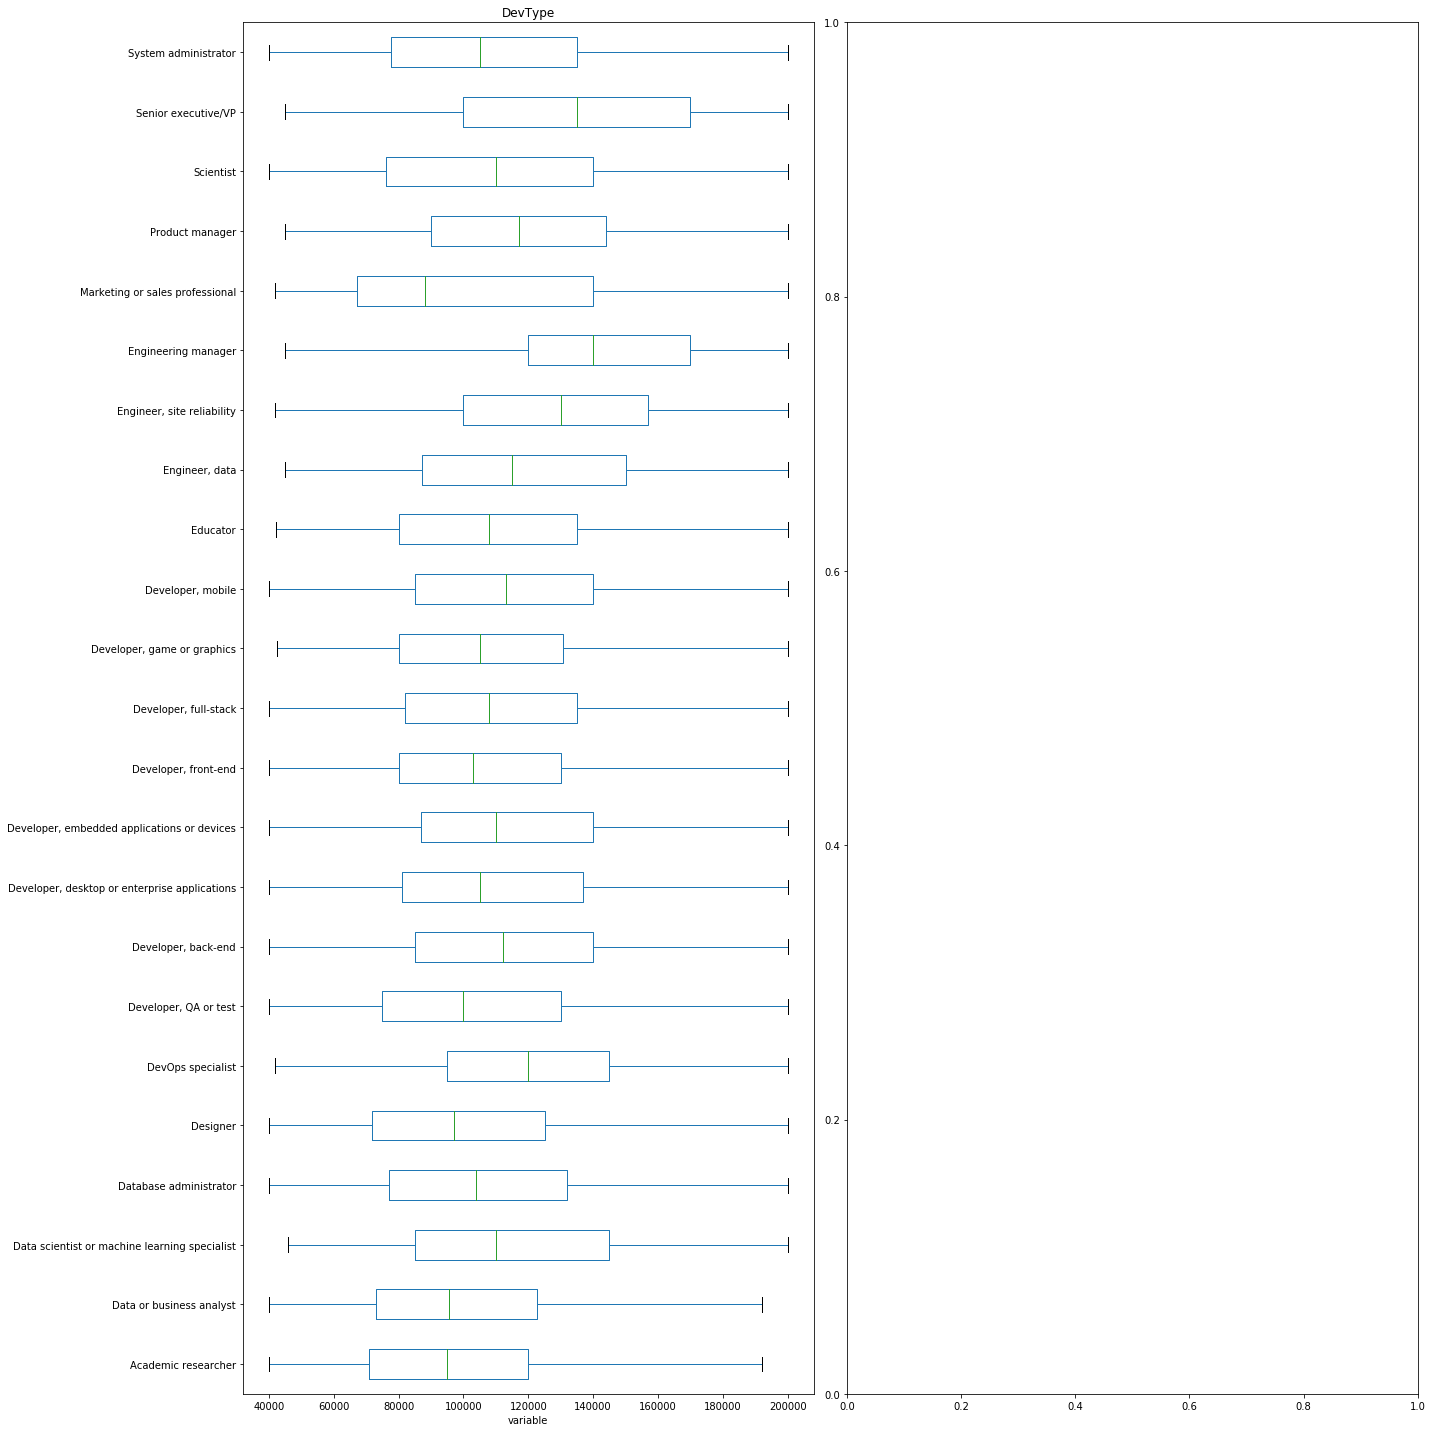

In [388]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro'], 
                     categoricals=['EdLevel'], 
                     multi_options=['DevType'])

In [391]:
run_model(us_df_limited)

(6325, 34) before trim
(6097, 33) after trim
RFR Train Score: 0.6946436362730972
RFR Test Score: 0.12318085787634113
LR Train Score: 0.25344965037871936
LR Test Score: 0.25857217379144337
[('YearsCodePro', 0.3601542914857122), ('Developer, full-stack', 0.04484082743382378), ('Developer, desktop or enterprise applications', 0.039131568562652215), ('Developer, front-end', 0.03688529704054596), ('Developer, back-end', 0.0358557090502469), ('DevOps specialist', 0.0307212919085874), ('Developer, mobile', 0.0306071931098441), ('Designer', 0.026937262475322556), ('Engineering manager', 0.026786593771112876), ('Engineer, data', 0.02620933531516082)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(6456, 69)
(5773, 30)


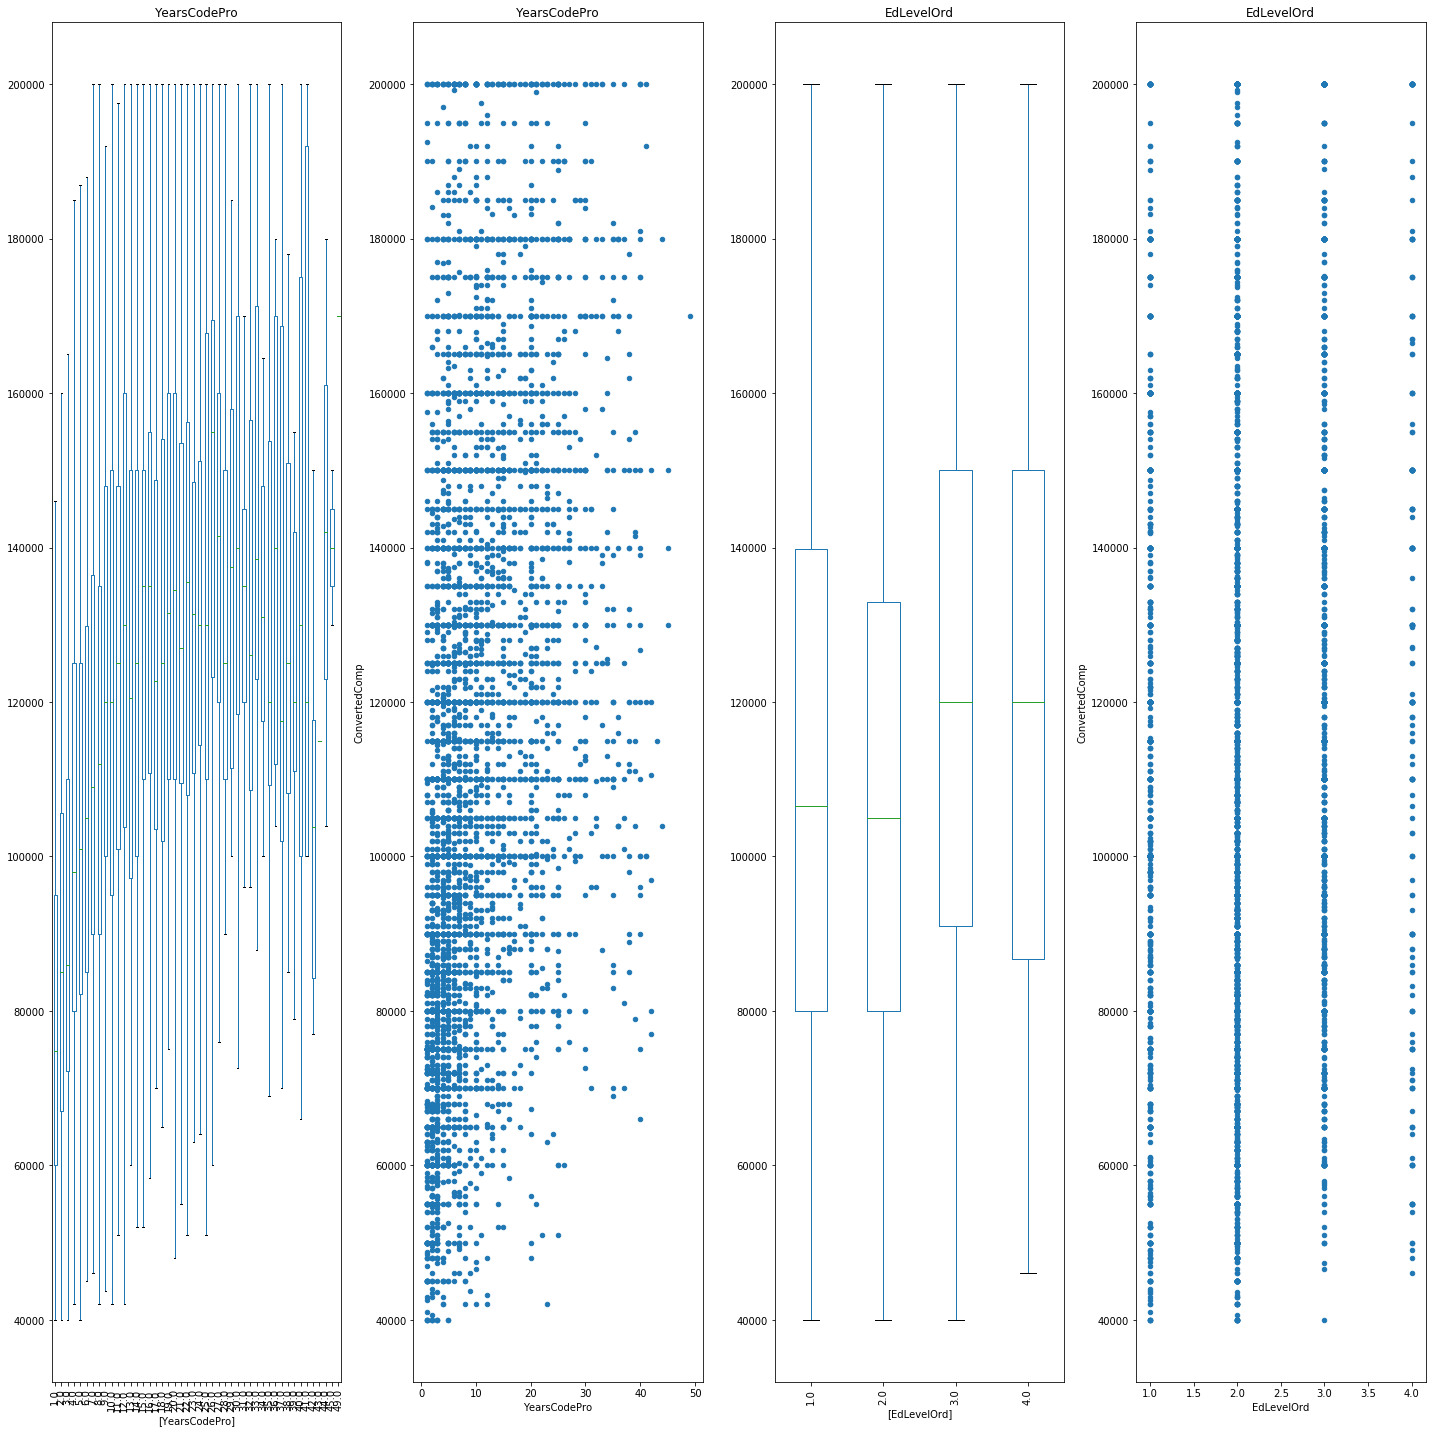

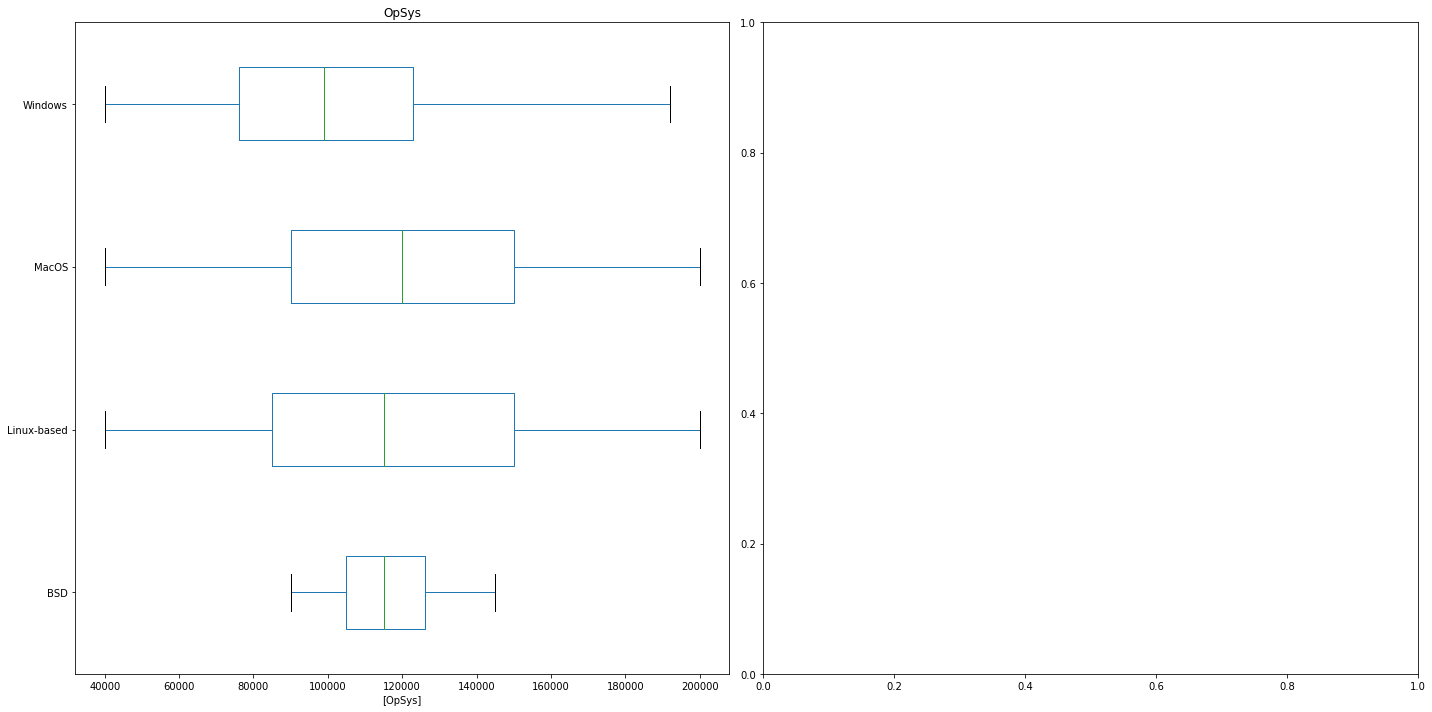

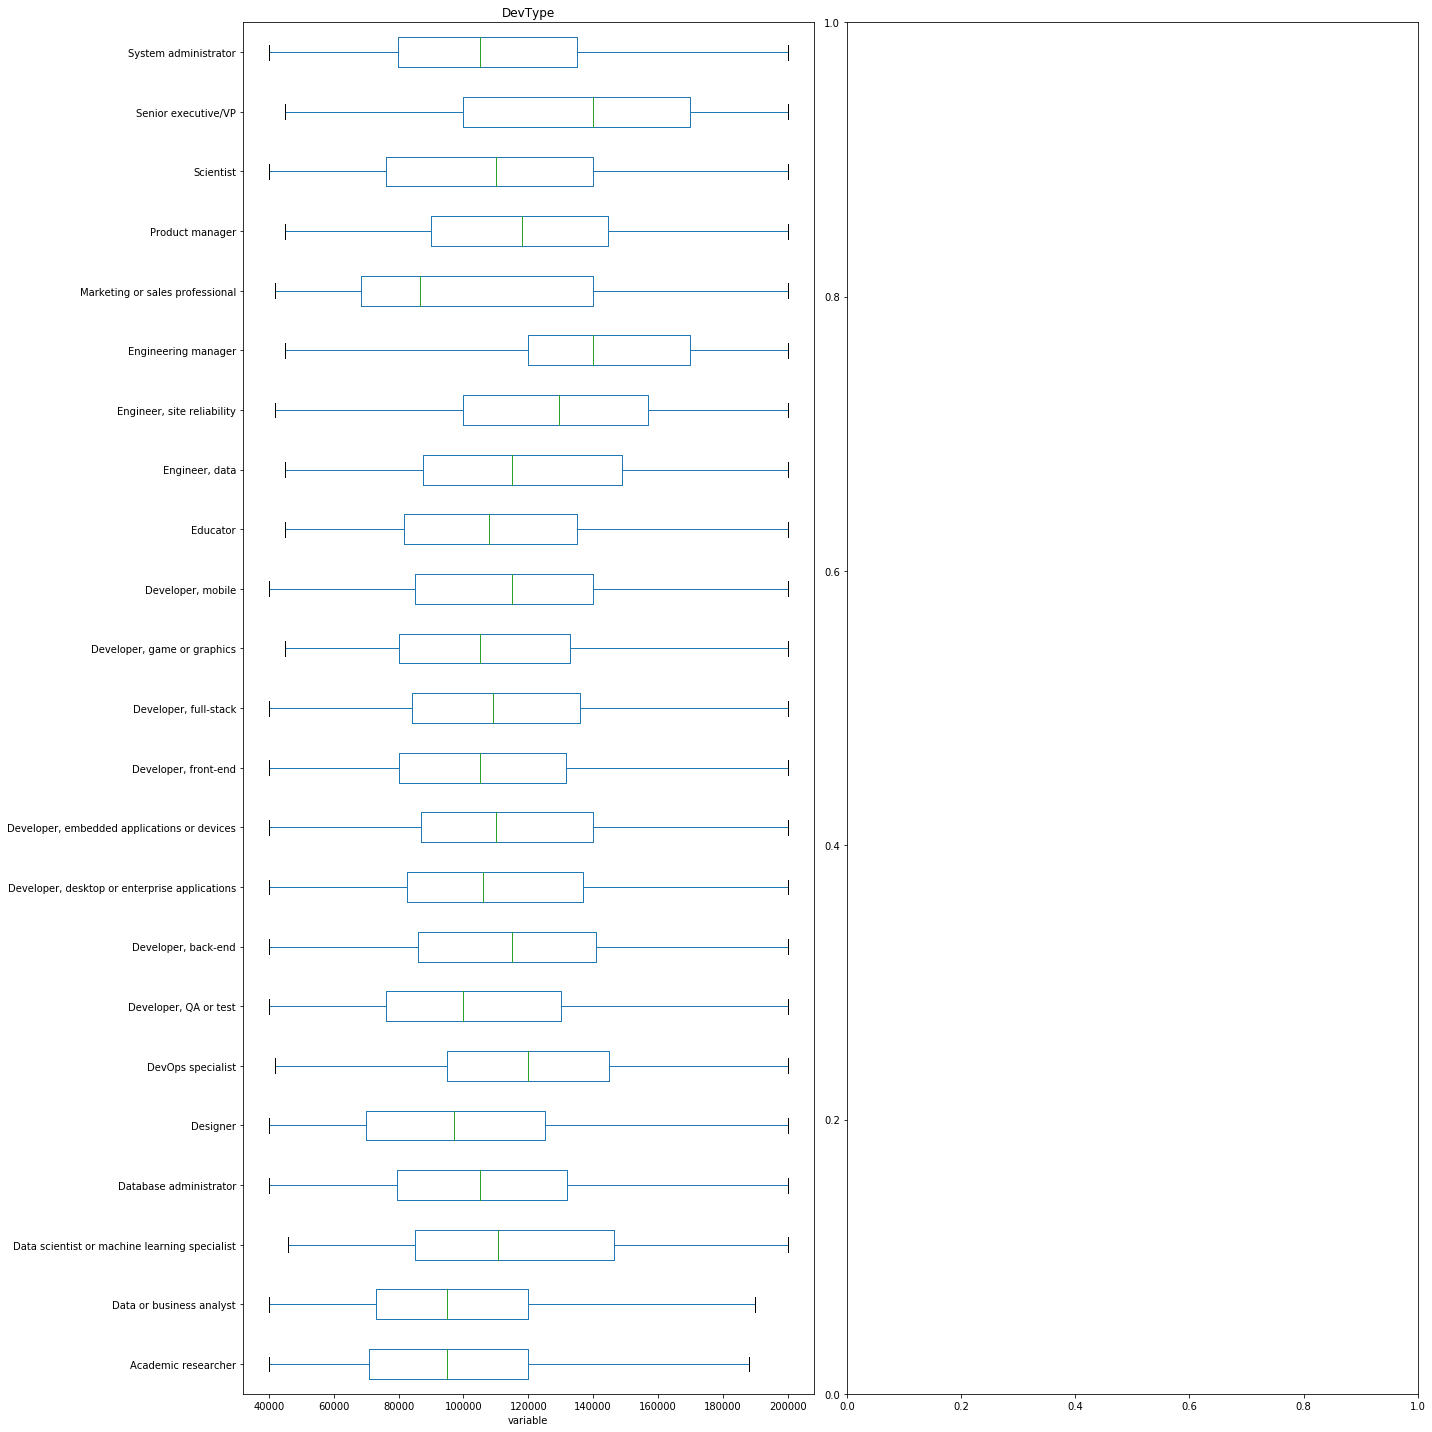

In [376]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro', 
                                 'EdLevelOrd'], 
                     categoricals=['OpSys'], 
                     multi_options=['DevType'])

In [378]:
run_model(us_df_limited)

(5773, 30) before trim
(5570, 29) after trim
RFR Train Score: 0.749519140633562
RFR Test Score: 0.1590379585940297
LR Train Score: 0.29824647633671175
LR Test Score: 0.3057711973330658
[('YearsCodePro', 0.34523463945347455), ('Windows', 0.07632262387947797), ('EdLevelOrd', 0.06480666802550837), ('Developer, back-end', 0.039461897715610296), ('Developer, full-stack', 0.03851929430545499), ('Developer, front-end', 0.03532231575495447), ('Developer, desktop or enterprise applications', 0.031342482042933724), ('Designer', 0.02785404422496982), ('Developer, mobile', 0.02762104827668836), ('Engineering manager', 0.026996598066799625)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [355]:
clean_us=us_df_limited[(us_df_limited['PlatformWorkedWithCnt']<=10) & 
                  (us_df_limited['YearsCodePro']<=30) & 
                  (us_df_limited['NEWCollabToolsWorkedWithCnt']<10) & 
                  (us_df_limited['MiscTechWorkedWithCnt']<10) & 
                  (us_df_limited['LanguageWorkedWithCnt']<15) & 
                  (us_df_limited['DevTypeCnt']<12) & 
                  (us_df_limited['DatabaseWorkedWithCnt']<11)]

In [357]:
run_model(clean_us)

(2924, 159) before trim
(2924, 158) after trim


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8703320897345654
RFR Test Score: 0.3145051514645939
LR Train Score: 0.43311882455178663
LR Test Score: 0.2737414238849517
[('YearsCodePro', 0.2281641232891498), ('Windows', 0.04868147340724206), ('LanguageWorkedWithCnt', 0.02526759340821195), ('PlatformWorkedWithCnt', 0.022385975621885573), ('NEWCollabToolsWorkedWithCnt', 0.022323796398265906), ('DevTypeCnt', 0.020374540855194585), ('Jira', 0.018580125376252875), ('DatabaseWorkedWithCnt', 0.018477420718647962), ('PHP', 0.018221336240833413), ('MiscTechWorkedWithCnt', 0.018212045514603505)]


(6456, 69)
(3591, 13)


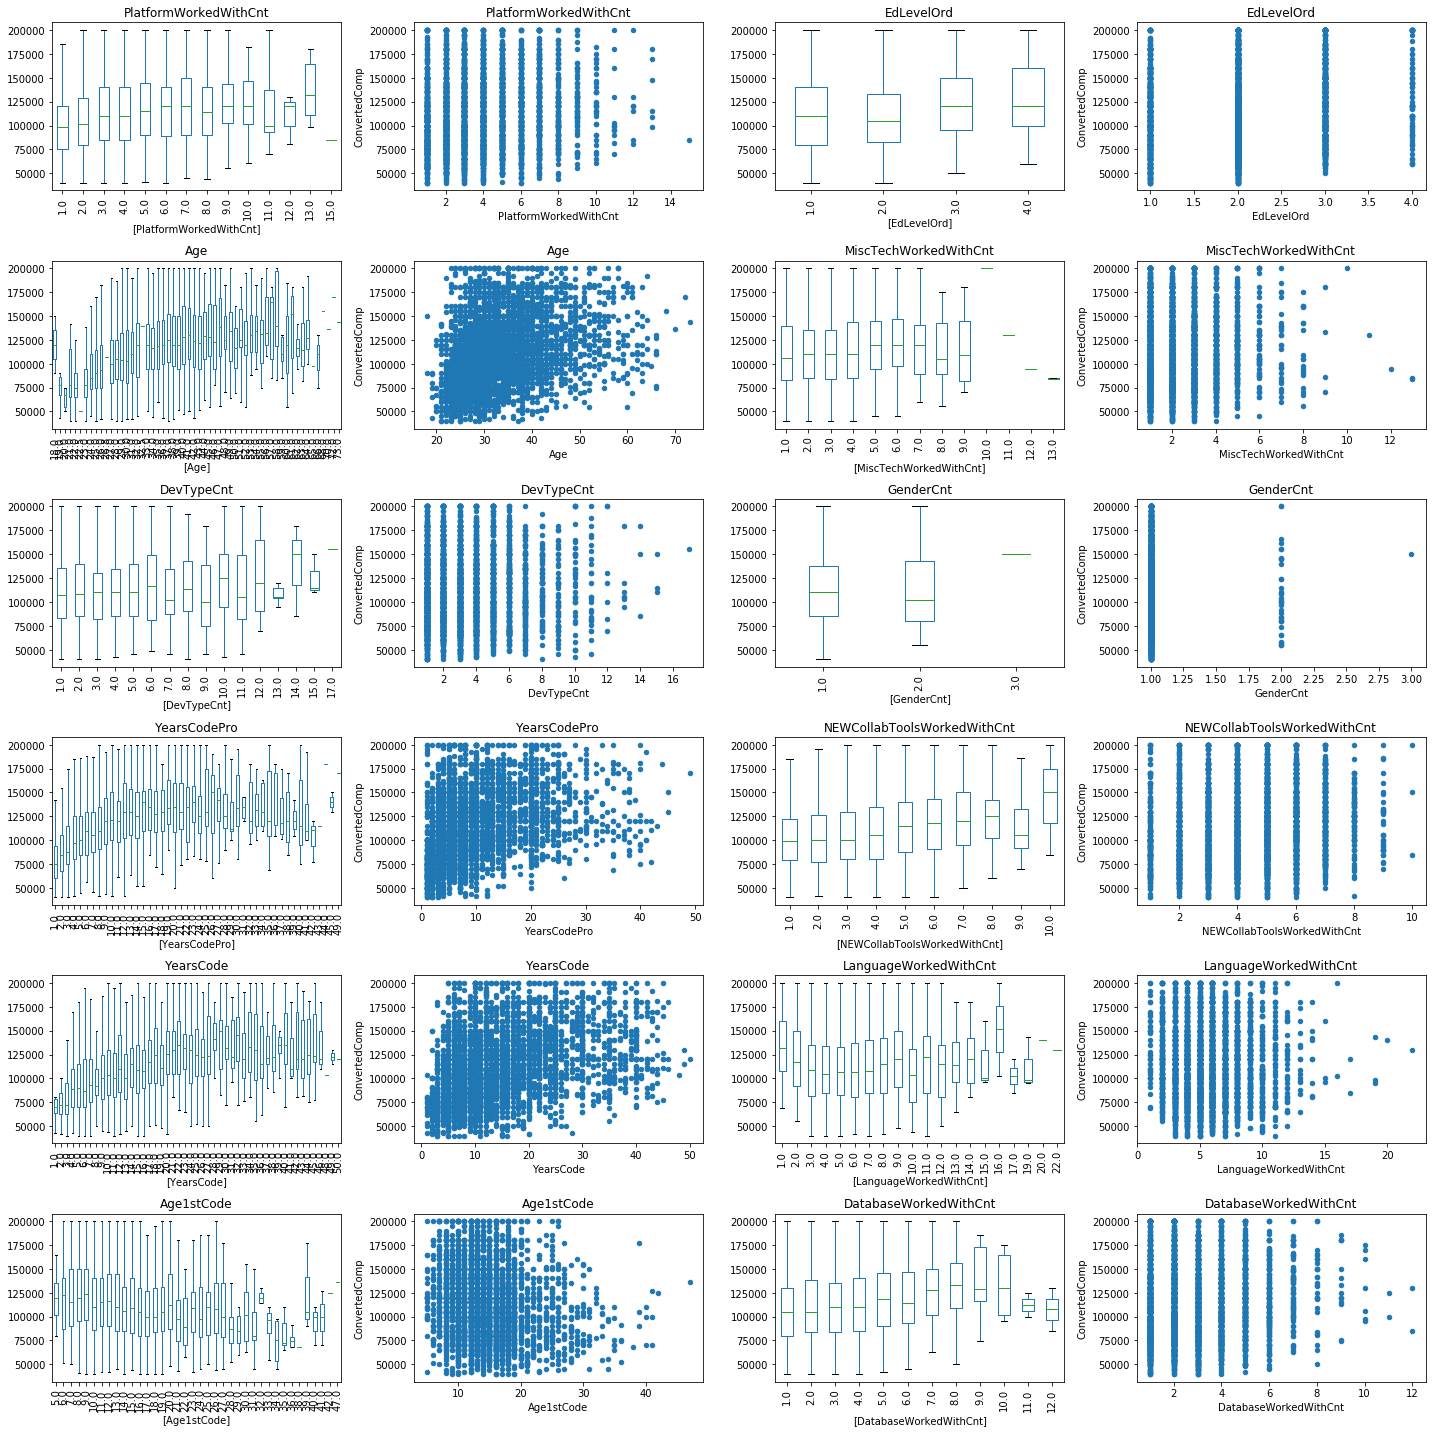

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [358]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df=transform_data(us, numericals=all_numericals, categoricals=[], multi_options=[])

In [360]:
run_model(us_df)

(3591, 13) before trim
(3442, 12) after trim
RFR Train Score: 0.8551841983164268
RFR Test Score: 0.13200600036369725
LR Train Score: 0.21675356302900398
LR Test Score: 0.17592034616174668
[('YearsCodePro', 0.2482843882265608), ('Age', 0.10138346627700123), ('Age1stCode', 0.09744311905104171), ('YearsCode', 0.08912575052730667), ('LanguageWorkedWithCnt', 0.08355502925549116), ('PlatformWorkedWithCnt', 0.07644968821280199), ('NEWCollabToolsWorkedWithCnt', 0.0760850829355377), ('DevTypeCnt', 0.07239120598091), ('DatabaseWorkedWithCnt', 0.06020725173923839), ('MiscTechWorkedWithCnt', 0.04814152081795384)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(2448, 69)
(1096, 142)


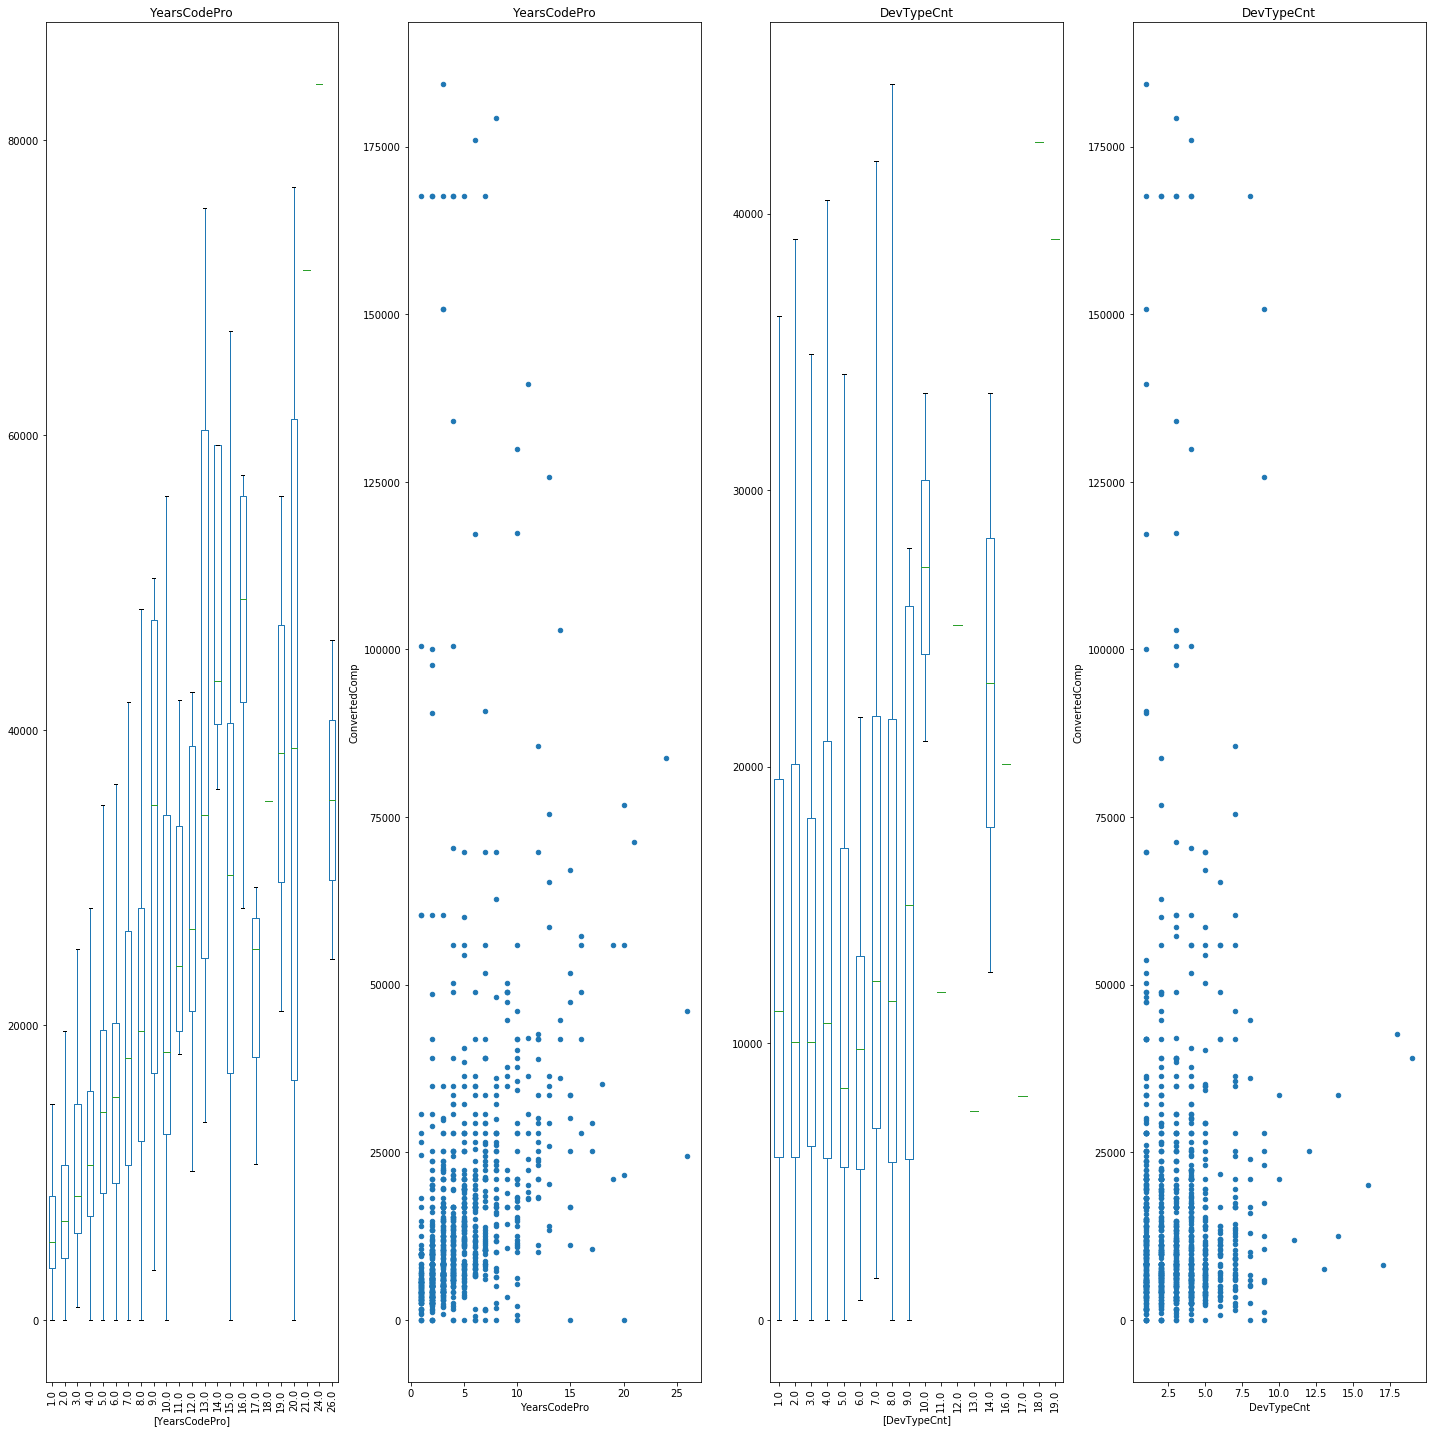

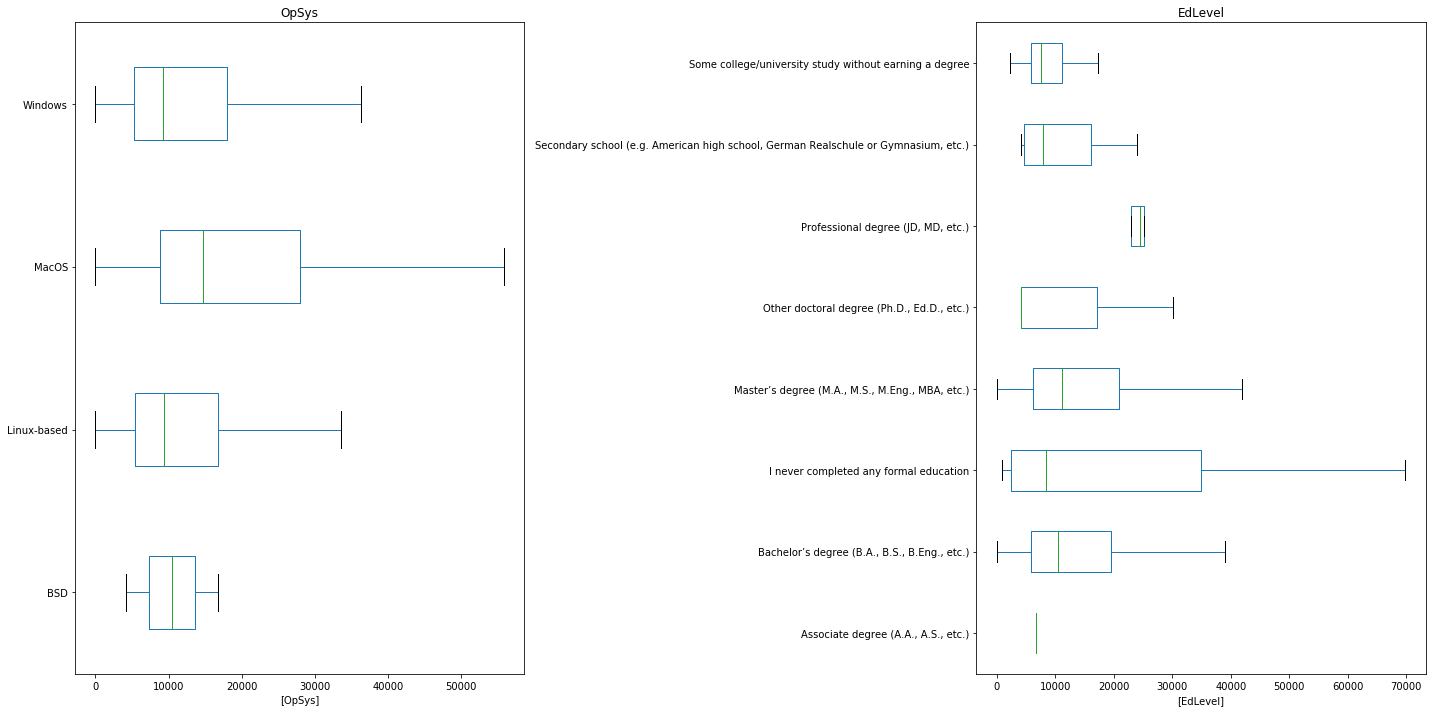

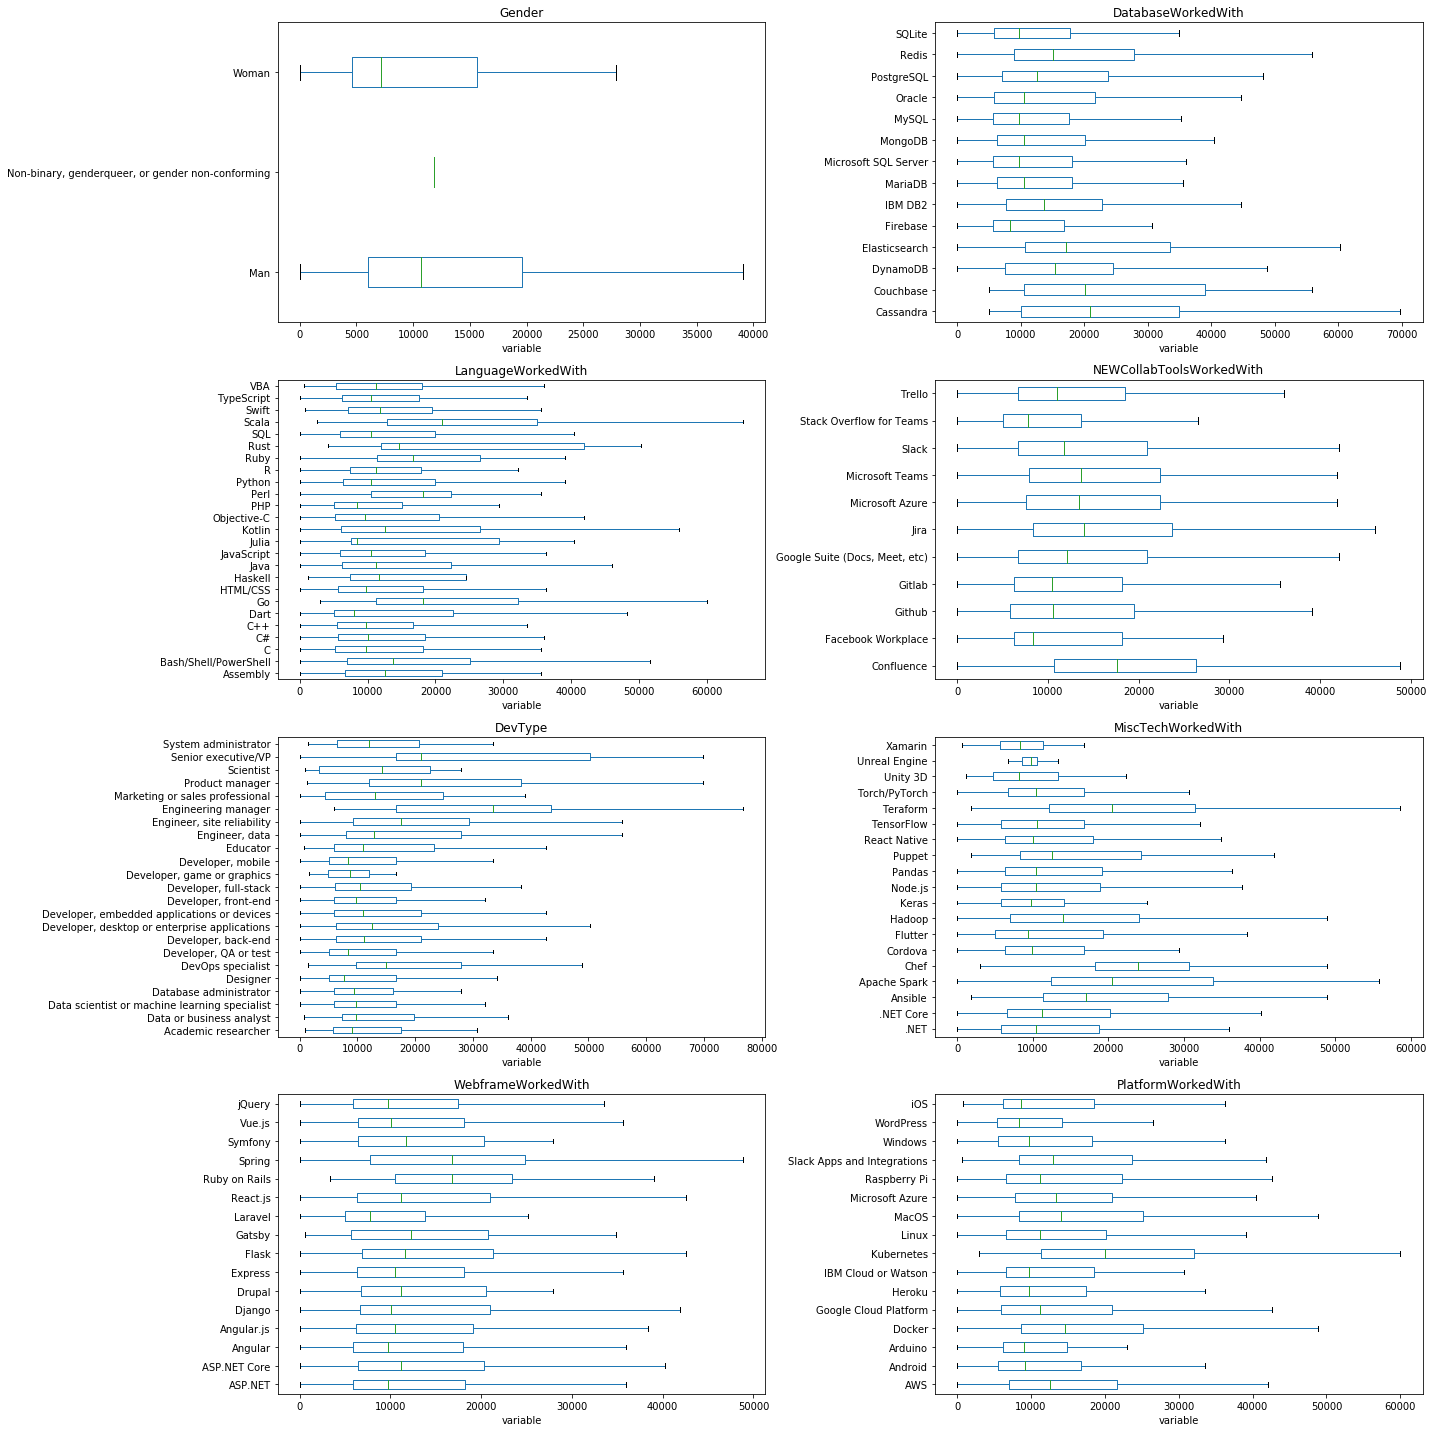

In [379]:
india=df[(df['Country']=='India') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000)]
india_df_limited=transform_data(india, 
                                numericals=['YearsCodePro', 
                                            'DevTypeCnt'], 
                                categoricals=['OpSys', 'EdLevel'], 
                                multi_options=all_multi_options)

In [381]:
run_model(india_df_limited)

(1096, 142) before trim
(1024, 141) after trim
RFR Train Score: 0.8187975682153852
RFR Test Score: -0.30547780596915075
LR Train Score: 0.31497544966922386
LR Test Score: -8.94102842576286e+23
[('YearsCodePro', 0.1333886029206503), ('Vue.js', 0.04858972845777784), ('DevTypeCnt', 0.03755175542706004), ('Professional degree (JD, MD, etc.)', 0.02747077255193994), ('React Native', 0.02142960565783115), ('Couchbase', 0.02126688723075867), ('Android', 0.019346184176386446), ('Slack Apps and Integrations', 0.018449530599668595), ('jQuery', 0.01778573050017029), ('JavaScript', 0.017350871742277497)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# All Features

['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']

['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']

['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [108]:
# print(numericals)
numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
# numericals=['YearsCodePro']
# print(categoricals)
categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
# categoricals=['EdLevel']
# print(multi_options)
multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
# multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

# Feature Engineering

In [53]:
for each_col in categoricals: 
    if categoricals[each_col]<100: 
        print(f'{each_col} options: {df[each_col].unique()}')
        print('='*20)

MainBranch options: ['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code' nan]
Hobbyist options: ['Yes' 'No' nan]
Age1stCode options: ['13' '19' '15' '18' '16' '14' '12' '20' '42' '8' '25' '22' '30' '17' '21'
 '10' '46' '9' '7' '11' '6' nan '31' '29' '5' 'Younger than 5 years' '28'
 '38' '23' '27' '41' '24' '53' '26' '35' '32' '40' '33' '36' '54' '48'
 '56' '45' '44' '34' 'Older than 85' '39' '51' '68' '50' '37' '47' '43'
 '52' '85' '64' '55' '58' '49' '76' '72' '73' '83' '63']
CompFreq options: ['Monthly' nan 'Yearly' 'Weekly']
EdLevel options: ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' nan
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, etc.)'
 'Some college/university st

In [44]:
comp_cols=['CompFreq','CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc','CurrencySymbol']
comp_df=df[comp_cols].dropna()
comp_df[comp_df['CompFreq']=='Weekly']

CompFreq     CompTotal  ConvertedComp         Country  \
85      Weekly  2.000000e+03       108100.0          France   
121     Weekly  1.200000e+05      2000000.0   United States   
132     Weekly  3.250000e+03       210050.0  United Kingdom   
173     Weekly  7.600000e+02        41100.0     Netherlands   
191     Weekly  1.200000e+05      2000000.0   United States   
...        ...           ...            ...             ...   
63762   Weekly  1.600000e+03        80000.0   United States   
63925   Weekly  8.740000e+09      1000000.0     Afghanistan   
63993   Weekly  5.521171e+09      1000000.0     Afghanistan   
64035   Weekly  6.600000e+04      2000000.0   United States   
64129   Weekly  3.000000e+03       150000.0   United States   

               CurrencyDesc CurrencySymbol  
85            European Euro            EUR  
121    United States dollar            USD  
132          Pound sterling            GBP  
173           European Euro            EUR  
191    United States dollar            USD  
...                     ...            ...  
63762  United States dollar            USD  
63925        Afghan afghani            AFN  
63993        Afghan afghani            AFN  
64035  United States dollar            USD  
64129  United States dollar            USD  

[969 rows x 6 columns]

In [35]:
currency_api_url='https://api.exchangeratesapi.io/latest?base=USD'
response=requests.get(currency_api_url)
currency_conv=response.json()['rates']
currency_conv

{'CAD': 1.2857142857,
 'HKD': 7.7506373879,
 'ISK': 125.0925240563,
 'PHP': 48.0549387285,
 'DKK': 6.1213093182,
 'HUF': 294.9008964553,
 'CZK': 21.8093593223,
 'GBP': 0.7425117197,
 'RON': 4.0073196809,
 'SEK': 8.4363845711,
 'IDR': 14164.2980508265,
 'INR': 73.7523645037,
 'BRL': 5.1615264413,
 'RUB': 74.0750884119,
 'HRK': 6.2024015133,
 'JPY': 103.9888148696,
 'THB': 30.1603750308,
 'CHF': 0.8900402994,
 'EUR': 0.8224360556,
 'MYR': 4.0600378321,
 'BGN': 1.6085204375,
 'TRY': 7.7832058557,
 'CNY': 6.5318693972,
 'NOK': 8.7670038654,
 'NZD': 1.4190311703,
 'ZAR': 15.1882556131,
 'USD': 1.0,
 'MXN': 19.828193108,
 'SGD': 1.3328398717,
 'AUD': 1.3477259643,
 'ILS': 3.2667160128,
 'KRW': 1086.109055021,
 'PLN': 3.6819639773}